Author: Yinan Wan and Bogdan Bintu

Date: 12/28/2022

This is inteded to generate probes for Yinan's genes to make zebrafish developmental atlas

See the video on how to donwload data from biomart:
https://www.youtube.com/watch?v=QvGT2G0-hYA
    
    
Download unspliced genes. This will couple all the exons together.

In [4]:
#The first time runing these scripts build the fast c-libraries:
!cd LibraryDesign3\C_Tools && python setup.py build_ext --inplace

Compiling .\seqint.pyx because it changed.
[1/1] Cythonizing .\seqint.pyx
running build_ext
building 'seqint' extension


C:\Program Files\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: U:\Scientific Data\RG-AS04-Data01\seqFISH\Code\ProbeDesigning\LibraryDesign3\C_Tools\seqint.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
error: Unable to find vcvarsall.bat


In [10]:
import sys
sys.path.append(r'E:\Molecular_Trajectories\LibraryDesign\LibraryDesign3\C_Tools')
from seqint import seq2Int,seq2Int_rc

In [13]:
#seq2Int('ACCTAGCGACGTGACT'.encode())

In [1]:
import sys,os
sys.path.append(os.path.abspath(r'LibraryDesign3'))
import LibraryDesigner as ld
import LibraryTools as lt
#from seqint import seq2Int, seq2Int_rc
# some other packages may required
import Bio #use pip install biopython

E:\Molecular_Trajectories\LibraryDesign\LibraryDesign3\C_Tools


### Construct count table of 17-mers across zebrafish transcriptome - Not required this time

Note: only need to do this once. Did not run

In [23]:
ct = ld.countTable(word=17,save_file=r'C:\Users\Bogdan\Dropbox\SchierLab\z11\zebrafish_GRCz11_genesUnspliced_17w.bin',
                   sparse=False)
fl = r'C:\Users\Bogdan\Dropbox\SchierLab\z11\zebrafish_GRCz11_genesUnspliced.fasta'
names,seqs = lt.fastaread(fl)
from tqdm import tqdm
for sq in tqdm(seqs):
    ct.consume(sq,verbose=False)
ct.complete(verbose=True)
ct.save()

100%|███████████████████████████████████████████████████████████████████████████| 37241/37241 [04:00<00:00, 154.57it/s]


Time to compute unique and clip: 180.322021484375
Time to update matrix: 5.6601481437683105


### Get the fasta files for the genes of interest

In [17]:
import numpy as np
import pandas as pd
fl = r'E:\Molecular_Trajectories\Gene_Selection\library_design_1000genes.csv'
lib1000 = pd.read_csv(fl)
ids_all = lib1000["ID"]

In [18]:
lib1000

ID       pref.trans.ID  names.zv11       NAMES.zv10  \
0    ENSDARG00000058179  ENSDART00000063665      ackr3b           ACKR3B   
1    ENSDARG00000037870  ENSDART00000141737       actb2            ACTB2   
2    ENSDARG00000018968  ENSDART00000023094     acvr1ba          ACVR1BA   
3    ENSDARG00000056250  ENSDART00000078703       add3b            ADD3B   
4    ENSDARG00000039429  ENSDART00000159585        adka             ADKA   
..                  ...                 ...         ...              ...   
995  ENSDARG00000079376  ENSDART00000152635  zgc:174153       ZGC:174153   
996  ENSDARG00000092889  ENSDART00000136306  zgc:194246            SYCE3   
997  ENSDARG00000040971  ENSDART00000060037   zgc:92606        GABARAPL1   
998  ENSDARG00000035563  ENSDART00000051553      znf703           ZNF703   
999  ENSDARG00000079126  ENSDART00000114742      znfl1i  SI:DKEY-250I3.3   

     is.TF  is.landmark  is.morph  is.morph.CRISPR cell.type  is.top_1000  \
0    False        False      True             True       NaN         True   
1    False        False      True            False       NaN         True   
2    False        False      True            False       NaN         True   
3    False        False      True            False       NaN         True   
4    False        False     False            False       NaN         True   
..     ...          ...       ...              ...       ...          ...   
995  False        False     False            False       NaN         True   
996  False        False      True            False       NaN         True   
997  False        False      True            False       NaN         True   
998  False        False      True            False       NaN         True   
999  False        False     False            False       NaN         True   

     is.top_500  
0          True  
1          True  
2          True  
3          True  
4          True  
..          ...  
995       False  
996       False  
997       False  
998       False  
999       False  

[1000 rows x 11 columns]

File downloaded from biomart is here. cDNA is from transcript ID (ENSDART)

E:\Molecular_Trajectories\Gene_Selection\lib1000.fasta

### average scRNA seq data per "cell type"
Only need to run in once. Did not run for EmbryoAtlas

In [31]:
import sys,os
import numpy as np, matplotlib.pyplot as plt
import pickle
import imp
import glob
from tqdm import tqdm_notebook as tqdm

import scanpy as sc
from scipy.stats import zscore
import numpy as np
import pandas as pd

In [29]:
fl = r'G:\Shared drives\Yinan_Bogdan_SharedDrive\22-05-03_SeqLib_FullRun1\GSE66688_zdata.expMatrix.txt'
lines = np.array([ln[:-1].split('\t') for ln in open(fl,'r') if len(ln)>0][1:])
data_sc = np.array(lines[:,1:],dtype=np.float32)
genes_sc = lines[:,0]

C:\Users\Bogdan\anaconda3\envs\cellpose\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


         Falling back to preprocessing with `sc.pp.pca` and default params.


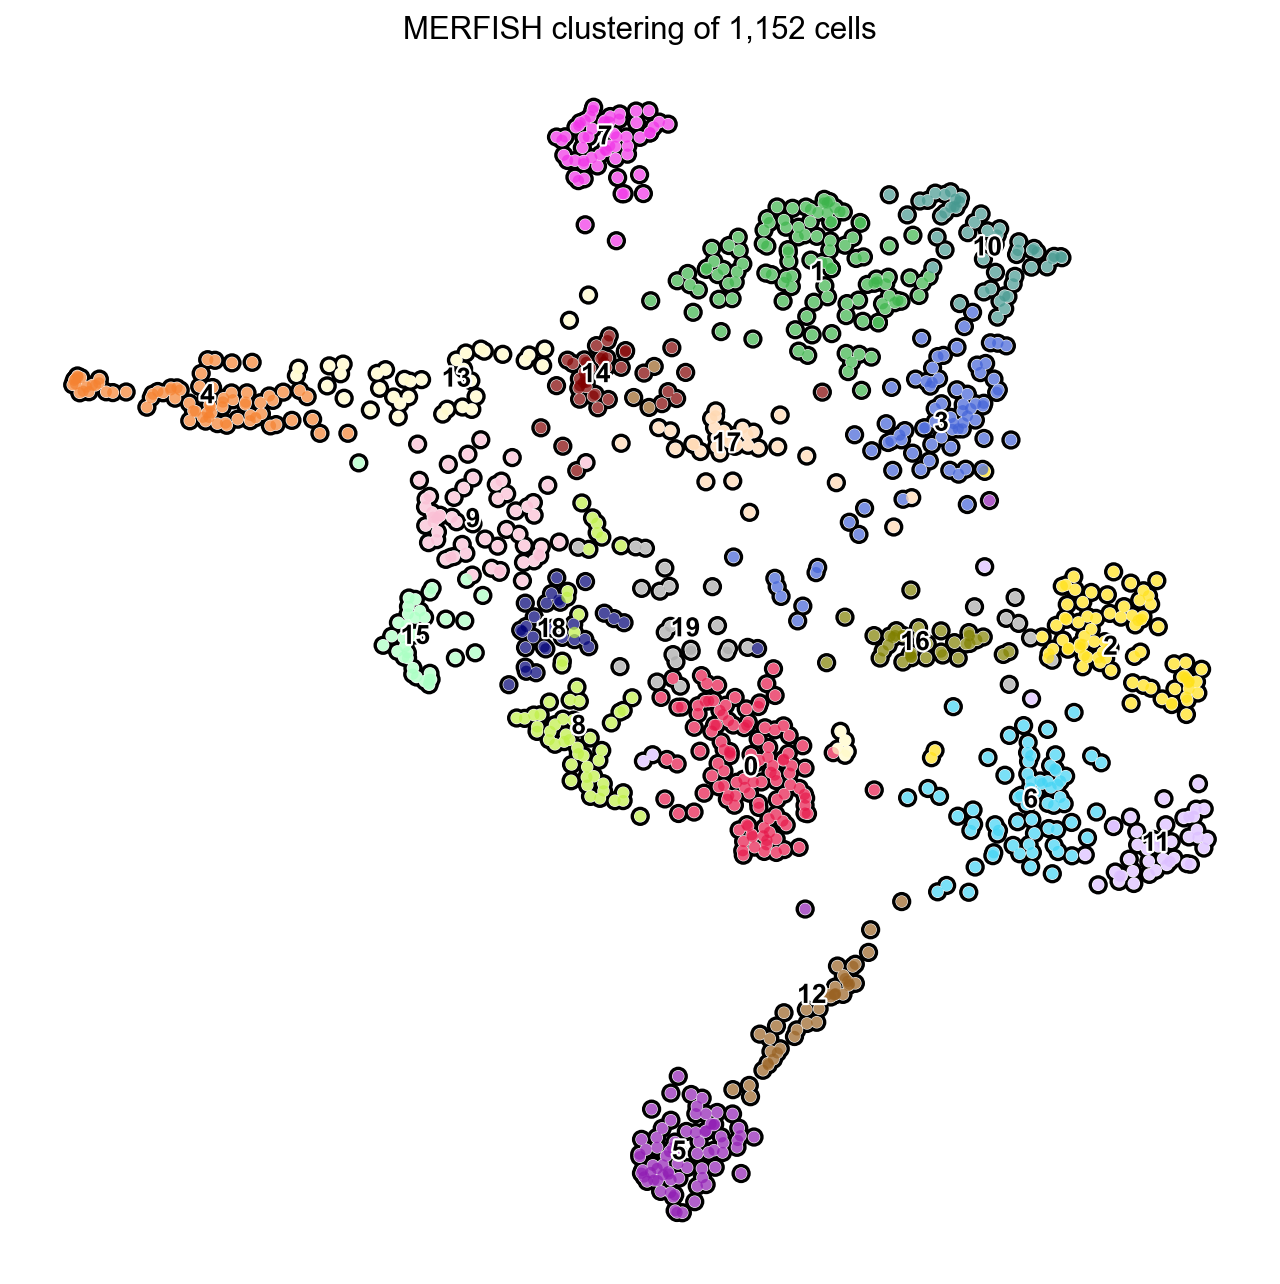

In [32]:

count_table2 = pd.DataFrame(data=data_sc.T, columns=genes_sc)



scdata2_sc = sc.AnnData(count_table2)

sc.pp.filter_cells(scdata2_sc, min_genes=5)
sc.pp.calculate_qc_metrics(scdata2_sc, percent_top=None, inplace=True)
sc.pp.normalize_total(scdata2_sc, target_sum=np.median(scdata2_sc.obs["total_counts"]))


### Tried volume normalization but did not work well.

#volume = np.array(list(celldata['volume'].reindex(index=scdata.obs.index.astype(int))),dtype=np.float)
#scdata.X = scdata.X/volume[:,np.newaxis]*np.median(volume)



sc.pp.log1p(scdata2_sc)

#scdata2.X = scdata2.to_df().apply(zscore, axis=0).to_numpy()

### Should we use PCA?

### Should we do z-scores. Explore this with spatial maps. Visual inspection.

sc.pp.neighbors(scdata2_sc)  #metric='correlation', use_rep = "X"
sc.tl.leiden(scdata2_sc, resolution=2) #### 
#plt.figure()
sc.tl.umap(scdata2_sc,random_state=9,min_dist=0.25)
cmap = ["#e6194B", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4", "#42d4f4", "#f032e6", "#bfef45",
        "#fabed4", "#469990", "#dcbeff", "#9A6324", "#fffac8", "#800000", "#aaffc3", "#808000", "#ffd8b1",
        "#000075", "#a9a9a9"]

sc.set_figure_params(figsize=(10,10))
sc.pl.umap(
    scdata2_sc,
    color="leiden",
    add_outline=True,
    legend_loc="on data",
    legend_fontsize=12,
    legend_fontoutline=2,
    frameon=False,
    title=f"MERFISH clustering of {len(scdata2_sc):,d} cells",
    palette=cmap
)

In [56]:
leiden = scdata2_sc.obs['leiden']
norm_counts = np.exp(scdata2_sc.X)-1
CTM = np.array([np.mean(norm_counts[leiden==cl],axis=0) for cl in np.unique(leiden)])
genes = list(scdata2_sc.var.index)

In [83]:
cells = ['']+['cell_type_'+str(cell) for cell in np.unique(leiden)]
head = ','.join(cells)+'\n'
fid = open(r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\MERFISH\50percEpibo_umis.txt','w')
fid.write(head)
for ign,gn in enumerate(genes):
    txt = gn+','+','.join(CTM[:,ign].astype(str))+'\n'
    fid.write(txt)
fid.close()

### Make a file with the top 100 and 500 genes per cell type

In [86]:
import sys,os
sys.path.append(os.path.abspath(r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\LibraryDesign3'))
import LibraryTools as lt
import numpy as np

In [95]:
transcript_file = r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\z11\zebrafish_GRCz11_genesUnspliced.fasta'
namesT,seqsT = lt.fastaread(transcript_file)
dic_sq = {nm.split('|')[-4].upper():sq for sq,nm in zip(seqsT,namesT)}

In [ ]:
umi_files = [r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\MERFISH\50percEpibo_umis.txt']
def read_umi_fl(fl):
    lines = [ln[:-1].split(',') for ln in open(fl,'r')]
    cells = lines[0][1:]
    genes = [ln[0] for ln in lines[1:]]
    M = np.array([ln[1:] for ln in lines[1:]],dtype=np.float32)
    return np.array(cells),np.array(genes),M

genes_bad = []
for umi_fl in umi_files:
    cells,genes,M = read_umi_fl(umi_fl)
    bad = np.unique(np.argsort(M,axis=0)[-100:,:])
    genes_bad += list(genes[bad])
genes_bad = list(np.unique(genes_bad))
genes_bad = [gn.upper() for gn in genes_bad]
seqs = [dic_sq[gn] for gn in genes_bad if gn in dic_sq]
names = [gn for gn in genes_bad if gn in dic_sq]
print("Number of genes with high expression:",len(names))
lt.fastawrite(r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\MERFISH\top_tr100.fasta',
              names,seqs)


In [97]:
umi_files = [r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\MERFISH\50percEpibo_umis.txt']
def read_umi_fl(fl):
    lines = [ln[:-1].split(',') for ln in open(fl,'r')]
    cells = lines[0][1:]
    genes = [ln[0] for ln in lines[1:]]
    M = np.array([ln[1:] for ln in lines[1:]],dtype=np.float32)
    return np.array(cells),np.array(genes),M

genes_bad = []
for umi_fl in umi_files:
    cells,genes,M = read_umi_fl(umi_fl)
    bad = np.unique(np.argsort(M,axis=0)[-500:,:])
    genes_bad += list(genes[bad])
genes_bad = list(np.unique(genes_bad))
genes_bad = [gn.upper() for gn in genes_bad]
seqs = [dic_sq[gn] for gn in genes_bad if gn in dic_sq]
names = [gn for gn in genes_bad if gn in dic_sq]
print("Number of genes with high expression:",len(names))
lt.fastawrite(r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\MERFISH\top_tr500.fasta',
              names,seqs)


Number of genes with high expression: 812


### Make a file with the top 3000 genes at the 50% epiboly stage

In [26]:
txt = [[e if e!='' else '0' for e in ln[:-1].split('\t')] 
       for ln in open(r'.\z11\E-ERAD-475-query-results.tpms.tsv','r') if ln[0]!='#' and len(ln)>2]

In [27]:
head = txt[0]
i50 = head.index('gastrula 50%-epiboly')
import numpy as np
gene_ids = np.array(txt)[1:,0]
tpm50 = np.array(txt)[1:,i50].astype(np.float32)

Text(0.5, 0, 'Sorted genes')

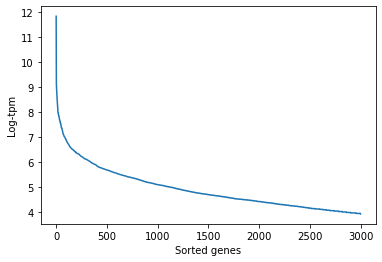

In [28]:
imaxs = np.argsort(tpm50)[::-1][:3000]
from matplotlib.pylab import plt
plt.figure()
plt.plot(np.log(tpm50[imaxs]))
plt.ylabel('Log-tpm')
plt.xlabel('Sorted genes')

In [38]:
import sys,os
sys.path.append(os.path.abspath(r'LibraryDesign3'))
import LibraryDesigner as ld
import LibraryTools as lt
from seqint import seq2Int, seq2Int_rc
# some other packages may required
import Bio #use pip install biopython

In [39]:
names_gns,seqs_gns = lt.fastaread(r'.\z11\zebrafish_GRCz11_genesUnspliced.fasta')
names_gns_ = [gn.split('|')[0]for gn in names_gns]

In [45]:
bad_genes = gene_ids[imaxs]
ibad_gns = [ibad for ibad,gn in enumerate(names_gns_) if gn in bad_genes]

In [50]:
bad_names = np.array(names_gns)[ibad_gns]
bad_seqs = np.array(seqs_gns)[ibad_gns]

In [52]:
lt.fastawrite(r'.\z11\zebrafish_GRCz11_genesUnspliced_top3000_50p-epiboly.fasta',bad_names,bad_seqs)

### Design target probes

#### Save fasta sequences to individual files

In [19]:
namesf,seqsf = lt.fastaread(r'.\Lib1000\lib1000_cdna.fasta')
fld = r'.\Lib1000\single_genes_ENSDARG'
if not os.path.exists(fld): os.makedirs(fld)
for nm,sq in zip(namesf,seqsf):
    gn = nm.split('|')[2].replace(':','_') + '_' + nm.split('|')[0]
    lt.fastawrite(fld+os.sep+gn+'.fasta',[nm],[sq])

### Find missing isoforms

#### Construct 12 bp count table per gene across transcriptome
Only need to run once. Did not run for EmbryoAtlas

In [106]:
import sys,os,glob
sys.path.append(r'.\LibraryDesign3')
sys.path.append(r'.\LibraryDesign3\C_Tools')
import LibraryTools as lt
import numpy as np
import LibraryDesigner as ld
import pickle
from tqdm import tqdm

def get_ints(sq,word = 12,verbose=True):
    ints = []
    if len(sq)>=word:
        sq_ = sq.encode()# encode to bytes
        iters = tqdm(range(len(sq_)-word+1)) if verbose else range(len(sq_)-word+1)
        for i in iters:
            ints.append(ld.seq2Int(sq_[i:i+word]))
    return ints


transcript_file = r'.\z11\zebrafish_GRCz11_genesUnspliced.fasta'
namesT,seqsT = lt.fastaread(transcript_file)

from tqdm.notebook import tqdm
intsT = [np.unique(get_ints(sq.upper(),verbose=False)) for sq in tqdm(seqsT)]


pickle.dump(intsT,open(r'.\z11\zebrafish_GRCz11_genesUnspliced12bp.pkl','wb'))

np.save(r'.\z11\names_transcriptome.npy',namesT)

  0%|          | 0/37241 [00:00<?, ?it/s]

#### Check for isoforms for each fasta file using parallel processing

In [20]:
print(os.path.abspath(r'.\z11\zebrafish_GRCz11_genesUnspliced12bp.pkl'))

E:\Molecular_Trajectories\LibraryDesign\z11\zebrafish_GRCz11_genesUnspliced12bp.pkl


In [26]:
import sys,os,glob
sys.path.append(r'.\LibraryDesign3')
import LibraryTools as lt
import numpy as np
import LibraryDesigner as ld
import pickle
from tqdm import tqdm

def get_ints(sq,word = 12,verbose=True):
    ints = []
    if len(sq)>=word:
        sq_ = sq.encode()# encode to bytes
        iters = tqdm(range(len(sq_)-word+1)) if verbose else range(len(sq_)-word+1)
        for i in iters:
            ints.append(ld.seq2Int(sq_[i:i+word]))
    return ints
def result_file(in_files,word=12):
    """
    writes results of homology to file replacing each filename .fasta -> _isoResults.results
    This file contains names of sequences with high homology, pvalue assuming Bernoulli, 
    fraction of orginal transcript homology, fraction of target trancript homology
    """
    import sys,os,glob
    sys.path.append(os.path.abspath(r'E:\Molecular_Trajectories\LibraryDesign\LibraryDesign3'))
    import LibraryTools as lt
    import numpy as np
    import LibraryDesigner as ld
    import pickle
    from tqdm import tqdm
    def get_ints(sq,word = 12,verbose=True):
        ints = []
        if len(sq)>=word:
            sq_ = sq.encode()# encode to bytes
            iters = tqdm(range(len(sq_)-word+1)) if verbose else range(len(sq_)-word+1)
            for i in iters:
                ints.append(ld.seq2Int(sq_[i:i+word]))
        return ints
    
    fl_ints = r'E:\Molecular_Trajectories\LibraryDesign\z11\zebrafish_GRCz11_genesUnspliced12bp.pkl'
    ints_tr  = pickle.load(open(fl_ints,'rb'))
    lens_tr = [len(int_) for int_ in ints_tr]
    names_tr = np.load(r'E:\Molecular_Trajectories\LibraryDesign\z11\names_transcriptome.npy')
    for fl in tqdm(in_files):
        fl_ = fl.replace('.fasta','_isoResults.results')
        if not os.path.exists(fl_):
            sq_T = lt.fastaread(fl)[-1][0]
            word=12
            lens_ = lens_tr
            ints__ = ints_tr
            names__ = names_tr
            intT = np.unique(get_ints(sq_T,word = word,verbose=False)[::word])
            CT = np.array([np.in1d(intT,int_,assume_unique=True) for int_ in tqdm(ints__)])
            logprand = np.log(np.sum(CT[:,:]))-np.log(np.sum(lens_))-np.log(CT.shape[-1])
            from scipy.stats import binomtest
            pvalues = []
            for itr in np.arange(len(CT)):
                pvalue=1
                if lens_[itr]>0:
                    result = binomtest(np.sum(CT[itr]), n=lens_[itr], p=np.exp(logprand+np.log(CT.shape[-1])), alternative='greater')
                    pvalue = result.pvalue
                pvalues.append(pvalue)
            ibest = np.argsort(np.log(pvalues))[:500]
            result = [(names__[ib],pvalues[ib],np.mean(CT[ib]),np.sum(CT[ib])/lens_[ib]*word) for ib in ibest]
            text = '\n'.join([','.join([str(e) for e in ln]) for ln in result])

            fid = open(fl_,'w')
            fid.write(text)
            fid.close()

In [ ]:
#Run in terminal
#ipcluster start -n 40   ########<put desired number of engines to run here>

In [118]:
from ipyparallel import Client
rc = Client()
print(len(rc))
dv = rc[:40]

40


In [125]:
ncpu=40
in_files_ = [in_files[icpu*ncpu:(icpu+1)*ncpu] for icpu in range(len(in_files)//ncpu+1)]
in_files_ = [ln for ln in in_files_ if len(ln)>0]
np.sum([len(ln)for ln in in_files_]),len(in_files)


(249, 249)

In [126]:
dv.map_sync(result_file,in_files_);

In [24]:
in_files = glob.glob(r'E:\Molecular_Trajectories\LibraryDesign\Lib1000\single_genes_ENSDARG\*.fasta')
in_files = [fl for fl in in_files if 'auto' not in fl.lower()]
len(in_files)

1000

In [29]:
result_file(in_files)

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 25007.77it/s]


#### Save the most likely isoform sequences for each file

In [30]:
names_top,seqs_top = lt.fastaread(r'.\MERFISH\top_tr500.fasta')
names_top2,seqs_top2 = lt.fastaread(r'.\MERFISH\top_tr100.fasta')
names_tr,seqs_tr = lt.fastaread(r'.\z11\zebrafish_GRCz11_genesUnspliced.fasta')
names_tr_ = [nm.split('|')[-4].upper() for nm in names_tr]
len(names_top),len(names_top2)

(812, 178)

In [31]:
fls = glob.glob(r'.\Lib1000\single_genes_ENSDARG\*.results')
len(fls)

1000

In [32]:
fls

['.\\Lib1000\\single_genes_ENSDARG\\abca1b_ENSDARG00000079009_isoResults.results',
 '.\\Lib1000\\single_genes_ENSDARG\\ackr3b_ENSDARG00000058179_isoResults.results',
 '.\\Lib1000\\single_genes_ENSDARG\\actb1_ENSDARG00000037746_isoResults.results',
 '.\\Lib1000\\single_genes_ENSDARG\\actb2_ENSDARG00000037870_isoResults.results',
 '.\\Lib1000\\single_genes_ENSDARG\\actn4_ENSDARG00000099786_isoResults.results',
 '.\\Lib1000\\single_genes_ENSDARG\\acvr1ba_ENSDARG00000018968_isoResults.results',
 '.\\Lib1000\\single_genes_ENSDARG\\adamts18_ENSDARG00000001999_isoResults.results',
 '.\\Lib1000\\single_genes_ENSDARG\\adarb2_ENSDARG00000071823_isoResults.results',
 '.\\Lib1000\\single_genes_ENSDARG\\add3a_ENSDARG00000040874_isoResults.results',
 '.\\Lib1000\\single_genes_ENSDARG\\add3b_ENSDARG00000056250_isoResults.results',
 '.\\Lib1000\\single_genes_ENSDARG\\adipor1a_ENSDARG00000002912_isoResults.results',
 '.\\Lib1000\\single_genes_ENSDARG\\adipor2_ENSDARG00000101849_isoResults.results',
 '.

In [33]:
fl = fls[-3]
print(fl)
M = np.array([ln[:-1].split(',') for ln in open(fl,'r')])
pval,fr1,fr2=M[:,1:].astype(np.float32).T
names_ = M[:,0]
names_ = np.array([nm.split('|')[-4].upper() for nm in names_])
np.array([names_,pval,fr1,fr2]).T[:10]

.\Lib1000\single_genes_ENSDARG\znfl1i_ENSDARG00000079126_isoResults.results


array([['ZNFL1L', '0.0', '0.8129032', '0.33622414'],
       ['ZNFL1I', '0.0', '0.9935484', '0.41167298'],
       ['ZNFL1B', '0.0', '0.86451614', '0.35757172'],
       ['AL928824.1', '0.0', '0.8129032', '0.33674833'],
       ['ZNFL1G', '0.0', '0.7935484', '0.33042312'],
       ['ZNFL1', '0.0', '0.7870968', '0.32540566'],
       ['ZNFL1C', '0.0', '0.7870968', '0.32332155'],
       ['ZNFL1K', '0.0', '0.7870968', '0.3231788'],
       ['ZNFL1H', '0.0', '0.7612903', '0.3134824'],
       ['BX571786.1', '0.0', '0.9935484', '0.07589634']], dtype='<U32')

Note: If more than 75% of the transcript is speciffically shared with a different sequence then consider it a missannotation of isoforms.

In [63]:
from tqdm.notebook import tqdm
for fl in tqdm(np.sort(fls)):
    M = np.array([ln[:-1].split(',') for ln in open(fl,'r')])
    pval,fr1,fr2=M[:,1:].astype(np.float32).T
    names_ = M[:,0]
    names_ = np.array([nm.split('|')[-4].upper() for nm in names_])

    keep = (np.log(pval)<np.log(10**(-3)))&(fr1>0.8)#################################
    #if True: #np.sum(keep)>1:
    #    print(fl)
    #    print(list(zip(names_[keep],pval[keep],fr1[keep],fr2[keep])))
    #    print()
    fl_save = fl.replace('_isoResults.results','_AutoIso_v2.fasta')
    inds_iso = [names_tr_.index(nm) for nm in names_[keep]]
    names_new = [names_tr_[itr] for itr in inds_iso]
    seqs_new = [seqs_tr[itr] for itr in inds_iso]
    lt.fastawrite(fl_save,names_new,seqs_new)

    inds_iso_top = [names_tr_.index(nm) for nm in names_[keep] if nm in names_top]
    names_new = [names_tr_[itr] for itr in inds_iso_top]
    seqs_new = [seqs_tr[itr] for itr in inds_iso_top]
    lt.fastawrite(fl_save.replace('_AutoIso_v2.fasta','_AutoIsoTop_v2.fasta'),names_new,seqs_new)

    inds_iso_top = [names_tr_.index(nm) for nm in names_[keep] if nm in names_top2]
    names_new = [names_tr_[itr] for itr in inds_iso_top]
    seqs_new = [seqs_tr[itr] for itr in inds_iso_top]
    lt.fastawrite(fl_save.replace('_AutoIso_v2.fasta','_AutoIsoTop2_v2.fasta'),names_new,seqs_new)

  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\wan0000\AppData\Local\Temp\ipykernel_17584\3261563820.py:8: RuntimeWarning: divide by zero encountered in log
  keep = (np.log(pval)<np.log(10**(-3)))&(fr1>0.8)


In [38]:
import sys,os
sys.path.append(os.path.abspath(r'LibraryDesign3'))
import LibraryTools as lt
import numpy as np
import LibraryDesigner as ld
import pickle
from tqdm import tqdm
import imp
imp.reload(lt)
imp.reload(ld)

E:\Molecular_Trajectories\LibraryDesign\LibraryDesign3\C_Tools


<module 'LibraryDesigner' from 'E:\\Molecular_Trajectories\\LibraryDesign\\LibraryDesign3\\LibraryDesigner.py'>

#### Check the auto-isoforms

Removed genes drll.1 and drl as the drll.2 probes for all three

In [64]:
import glob
fls_ = glob.glob(r'E:\Molecular_Trajectories\LibraryDesign\Lib1000\single_genes_ENSDARG\*_AutoIso_v2.fasta')
for fl in fls_:
    names_,seqs_ = lt.fastaread(fl)
    if ((os.path.basename(fl).split('_ENSDARG')[0]).lower()!=(names_[0].replace(':','_').lower())) | (names_[0]!=names_[-1]):
        print(os.path.basename(fl),names_)

apoc1_ENSDARG00000092170_AutoIso_v2.fasta ['APOC1', 'NBN']
apoeb_ENSDARG00000040295_AutoIso_v2.fasta ['APOEB', 'NBN']
arhgef10_ENSDARG00000077788_AutoIso_v2.fasta ['ARHGEF10', 'AL928723.3']
atrxl_ENSDARG00000099449_AutoIso_v2.fasta ['AL935333.4', 'ATRXL']
cxcr4b_ENSDARG00000041959_AutoIso_v2.fasta ['CXCR4B', 'CR522881.1']
drll.1_ENSDARG00000035151_AutoIso_v2.fasta ['DRLL.1', 'DRLL.2']
drll.2_ENSDARG00000035150_AutoIso_v2.fasta ['DRLL.2', 'DRL', 'DRLL.1']
drl_ENSDARG00000078004_AutoIso_v2.fasta ['DRL', 'DRLL.2']
fzd10_ENSDARG00000068213_AutoIso_v2.fasta ['PIWIL1', 'FZD10']
gabrp_ENSDARG00000020901_AutoIso_v2.fasta ['GABRP', 'BX248097.2', 'BX248097.1']
hoxc6a_ENSDARG00000070343_AutoIso_v2.fasta ['HOXC6A', 'HOXC3A']
hoxc8a_ENSDARG00000070346_AutoIso_v2.fasta ['HOXC8A', 'HOXC3A']
nkx1.2la_ENSDARG00000006350_AutoIso_v2.fasta ['NKX1.2LA', 'BX294129.1']
psmb1_ENSDARG00000009640_AutoIso_v2.fasta ['PSMB1', 'BX323887.1']
rasl11b_ENSDARG00000015611_AutoIso_v2.fasta ['RASL11B', 'BX511028.2']
rpl26

In [123]:
#result_file([in_files[0]],word=12)

### Design probes

In [2]:
!pip install biopython

In [3]:
import sys,os
sys.path.append(os.path.abspath(r'LibraryDesign3'))
import LibraryTools as lt
import numpy as np
import LibraryDesigner as ld
import pickle
from tqdm.notebook import tqdm
import imp
imp.reload(lt)
imp.reload(ld)

U:\Scientific Data\RG-AS04-Data01\seqFISH\Code\ProbeDesigning\LibraryDesign3\C_Tools
U:\Scientific Data\RG-AS04-Data01\seqFISH\Code\ProbeDesigning\LibraryDesign3\C_Tools


<module 'LibraryDesigner' from 'U:\\Scientific Data\\RG-AS04-Data01\\seqFISH\\Code\\ProbeDesigning\\LibraryDesign3\\LibraryDesigner.py'>

In [4]:
import glob
in_files = glob.glob(r'.\Lib1000\single_genes_ENSDARG\*.fasta')
in_files = [fl for fl in in_files if 'auto' not in fl.lower()]
len(in_files)

1000

In [5]:
import LibraryDesigner as ld
in_file = str(in_files[0])
save_file = in_file.replace('.fasta','.pbr')
print(in_file)
transcriptome_fl = r'.\z11\zebrafish_GRCz11_genesUnspliced_17w.bin'
#genome_fl = r'C:\Users\Bogdan\Dropbox\ChrisGlass_Project\mm10\allgenome_17w.bin'
rep_fl = r'.\z11\repetitive.fasta'
top_transcriptome_fl =  r'.\MERFISH\top_tr500.fasta'
top_transcriptome_fl2 =  r'.\MERFISH\top_tr100.fasta'

iso_file_top2 = in_file.replace('.fasta','_AutoIsoTop2_v2.fasta')
iso_file_top = in_file.replace('.fasta','_AutoIsoTop_v2.fasta')
iso_file = in_file.replace('.fasta','_AutoIso_v2.fasta') 

dic_check={('transcriptome','local_transcript'):15,
            ('top_transcriptome','local_transcript_top'):5,
            ('top_transcriptome2','local_transcript_top2'):3,
            'repetitive':3,'gc':[0.25,0.75],'tm':70}

pb_designer = ld.pb_reports_class(
    sequence_dic={'file':in_file,'use_revc':False,'use_kmer':True},
    map_dic={'transcriptome':{'file':transcriptome_fl,'use_revc':False,'use_kmer':True},
             'top_transcriptome':{'file':top_transcriptome_fl,'use_revc':False,'use_kmer':True},
             'top_transcriptome2':{'file':top_transcriptome_fl2,'use_revc':False,'use_kmer':True},
          'repetitive':{'file':rep_fl,'use_revc':True,'use_kmer':True},
          'local_transcript':{'file':iso_file,'use_revc':False,'use_kmer':True},
            'local_transcript_top':{'file':iso_file_top,'use_revc':False,'use_kmer':True},
            'local_transcript_top2':{'file':iso_file_top2,'use_revc':False,'use_kmer':True}},
          #'local_genome':{'file':local_genome_fl,'force_list':True,'use_revc':True,'use_kmer':True}},
    save_file=save_file,
    params_dic={'word_size':17,'pb_len':40,'buffer_len':0,'max_count':2**16-1,'check_on_go':False,'auto':False},
    dic_check=dic_check)

pb_designer.computeOTmaps()
pb_designer.compute_pb_report(verbose=True)
pb_designer.perform_check_end()
pb_designer.plots()
pb_designer.save_csv(name=os.path.basename(in_file).split('.')[0])

.\Lib1000\single_genes_ENSDARG\pou5f3_ENSDARG00000044774.fasta
Setting attribute: map_transcriptome
Setting attribute: map_top_transcriptome
Mapping no. of seqs: 812
Setting attribute: map_top_transcriptome2
Mapping no. of seqs: 178
Setting attribute: map_repetitive
Mapping no. of seqs: 67029
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 1
Time(s): 508.1931462287903
Dealing with sequence: 1 out of 1


100%|████████████████████████████████████████████████████████████████████████████| 2436/2436 [00:00<00:00, 3571.87it/s]


Time(s): 5.571282386779785
Picking non-overlaping sequences.
Time(s): 0.0796504020690918


In [6]:
from tqdm.notebook import tqdm
for in_fileT in tqdm(in_files[:]):

    in_file  = str(in_fileT)
    #print(in_file)
    #modify input file
    pb_designer.sequence_dic['file'] = in_file
    #modify save file
    pb_designer.save_file = in_file.replace('.fasta','.pbr')
    pb_designer.params_dic = {'word_size':17,'pb_len':40,'buffer_len':0,'max_count':2**16-1,'check_on_go':False,'auto':False}

    iso_file_top = in_file.replace('.fasta','_AutoIsoTop_v2.fasta')
    iso_file = in_file.replace('.fasta','_AutoIso_v2.fasta') 
    iso_file_top2 = in_file.replace('.fasta','_AutoIsoTop2_v2.fasta')
    for fl_ in [iso_file_top,iso_file,iso_file_top2]:
        if not os.path.exists(fl_):
            fid = open(fl_,'w')
            fid.close()

    #gene = os.path.basename(in_file).split('_')[0]

    pb_designer.dic_check={('transcriptome','local_transcript'):15,
            ('top_transcriptome','local_transcript_top'):5,
            ('top_transcriptome2','local_transcript_top2'):3,
            'repetitive':3,'gc':[0.25,0.75],'tm':70}

    if True:#not os.path.exists(pb_designer.save_file):
        pb_designer.load_sequence_file_and_paramaters()
        #modify maps
        key='local_transcript'
        pb_designer.map_dic[key]['file'] = iso_file
        pb_designer.files_to_OTmap("map_"+key,pb_designer.map_dic[key])
        
        key='local_transcript_top'
        names_iso,seqs_iso = lt.fastaread(iso_file_top)

        pb_designer.map_dic[key]['file'] = iso_file_top
        pb_designer.files_to_OTmap("map_"+key,pb_designer.map_dic[key])

            
            
        key='local_transcript_top2'
        names_iso,seqs_iso = lt.fastaread(iso_file_top2)

        pb_designer.map_dic[key]['file'] = iso_file_top2
        pb_designer.files_to_OTmap("map_"+key,pb_designer.map_dic[key])
            


        #compute
        pb_designer.compute_pb_report()
        pb_designer.perform_check_end()
        pb_designer.plots()
        pb_designer.save_csv(name=os.path.basename(in_file).split('.')[0])
       

  0%|          | 0/1000 [00:00<?, ?it/s]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 0.7407393455505371
Picking non-overlaping sequences.
Time(s): 0.08164095878601074
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.5545580387115479
Picking non-overlaping sequences.
Time(s): 0.05475902557373047
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.594576597213745
Picking non-overlaping sequences.
Time(s): 0.10553526878356934
Setting attribute: map_local_tra

Time(s): 1.1111063957214355
Picking non-overlaping sequences.
Time(s): 0.12544918060302734
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.6581182479858398
Picking non-overlaping sequences.
Time(s): 0.15830302238464355
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.096766948699951
Picking non-overlaping sequences.
Time(s): 0.06172895431518555
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.22500967979431152
Pic

Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.40919995307922363
Picking non-overlaping sequences.
Time(s): 0.04081988334655762
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.2962937355041504
Picking non-overlaping sequences.
Time(s): 0.1244509220123291
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.38729381561279297
Picking non-overlaping sequences.
Time(s): 0.037836313247680664
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_

Time(s): 0.40322446823120117
Picking non-overlaping sequences.
Time(s): 0.03384971618652344
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.7733852863311768
Picking non-overlaping sequences.
Time(s): 0.21306347846984863
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.0127298831939697
Picking non-overlaping sequences.
Time(s): 0.09060120582580566
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.8970503807067871
Pi

Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.705693006515503
Picking non-overlaping sequences.
Time(s): 0.1881701946258545
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.366981029510498
Picking non-overlaping sequences.
Time(s): 0.1563115119934082
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.7447218894958496
Picking non-overlaping sequences.
Time(s): 0.11449646949768066
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transc

Time(s): 0.6650717258453369
Picking non-overlaping sequences.
Time(s): 0.15929818153381348
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.3594169616699219
Picking non-overlaping sequences.
Time(s): 0.037833452224731445
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.0984179973602295
Picking non-overlaping sequences.
Time(s): 0.19912219047546387
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.9050154685974121
Pi

Time(s): 0.786536693572998
Picking non-overlaping sequences.
Time(s): 0.2718024253845215
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.225609302520752
Picking non-overlaping sequences.
Time(s): 0.11350083351135254
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.4924280643463135
Picking non-overlaping sequences.
Time(s): 0.14237260818481445
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.8970510959625244
Pickin

Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.6013526916503906
Picking non-overlaping sequences.
Time(s): 0.054758310317993164
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.641770362854004
Picking non-overlaping sequences.
Time(s): 0.15033912658691406
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.4229283332824707
Picking non-overlaping sequences.
Time(s): 0.19115829467773438
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_tr

Time(s): 1.1698548793792725
Picking non-overlaping sequences.
Time(s): 0.256868839263916
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.33785080909729
Picking non-overlaping sequences.
Time(s): 0.41815924644470215
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.098384141921997
Picking non-overlaping sequences.
Time(s): 0.08263635635375977
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.049344301223755
Picking n

Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.017122983932495
Picking non-overlaping sequences.
Time(s): 0.520704984664917
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.1688604354858398
Picking non-overlaping sequences.
Time(s): 0.6103129386901855
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.0334508419036865
Picking non-overlaping sequences.
Time(s): 0.5983672142028809
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcr

Time(s): 0.7357621192932129
Picking non-overlaping sequences.
Time(s): 0.48984313011169434
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.5750691890716553
Picking non-overlaping sequences.
Time(s): 0.11449670791625977
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.30565547943115234
Picking non-overlaping sequences.
Time(s): 0.0318608283996582
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.2166447639465332
Pic

Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.6125121116638184
Picking non-overlaping sequences.
Time(s): 0.17124605178833008
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.9488241672515869
Picking non-overlaping sequences.
Time(s): 0.7058925628662109
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.4213380813598633
Picking non-overlaping sequences.
Time(s): 0.1881723403930664
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_tran

Time(s): 1.4366815090179443
Picking non-overlaping sequences.
Time(s): 0.9000368118286133
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.1808056831359863
Picking non-overlaping sequences.
Time(s): 0.29072093963623047
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.1824910640716553
Picking non-overlaping sequences.
Time(s): 1.2435312271118164
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.296290636062622
Pickin

Time(s): 1.5621225833892822
Picking non-overlaping sequences.
Time(s): 0.858229398727417
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.1869723796844482
Picking non-overlaping sequences.
Time(s): 0.2976870536804199
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.5870144367218018
Picking non-overlaping sequences.
Time(s): 1.197725534439087
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.382511615753174
Picking n

Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.9743061065673828
Picking non-overlaping sequences.
Time(s): 1.271399736404419
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.8349192142486572
Picking non-overlaping sequences.
Time(s): 0.14734959602355957
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.9171552658081055
Picking non-overlaping sequences.
Time(s): 1.3868992328643799
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_trans

Time(s): 0.8233752250671387
Picking non-overlaping sequences.
Time(s): 0.5436077117919922
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.1409761905670166
Picking non-overlaping sequences.
Time(s): 0.11549186706542969
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.25089502334594727
Picking non-overlaping sequences.
Time(s): 0.02986907958984375
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.0593352317810059
Pic

Time(s): 1.4496219158172607
Picking non-overlaping sequences.
Time(s): 0.9587764739990234
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.4711267948150635
Picking non-overlaping sequences.
Time(s): 0.10952043533325195
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.7845499515533447
Picking non-overlaping sequences.
Time(s): 0.04977869987487793
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.30963611602783203
Pic

Time(s): 0.30167174339294434
Picking non-overlaping sequences.
Time(s): 0.026883840560913086
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 5.257684230804443
Picking non-overlaping sequences.
Time(s): 0.5107507705688477
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.43906712532043457
Picking non-overlaping sequences.
Time(s): 0.04380631446838379
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.531658411026001
Pic

Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.8100333213806152
Picking non-overlaping sequences.
Time(s): 0.9737145900726318
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.008361577987671
Picking non-overlaping sequences.
Time(s): 0.3653907775878906
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.4084019660949707
Picking non-overlaping sequences.
Time(s): 0.17821502685546875
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_trans

Time(s): 1.8170006275177002
Picking non-overlaping sequences.
Time(s): 1.0025849342346191
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.0744638442993164
Picking non-overlaping sequences.
Time(s): 0.19115853309631348
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.88470458984375
Picking non-overlaping sequences.
Time(s): 0.8651905059814453
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.0276682376861572
Picking

Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.3014395236968994
Picking non-overlaping sequences.
Time(s): 0.8711633682250977
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.7005112171173096
Picking non-overlaping sequences.
Time(s): 1.014538049697876
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.39784574508667
Picking non-overlaping sequences.
Time(s): 0.7636363506317139
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcri

Time(s): 1.0672996044158936
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.08780837059021
Picking non-overlaping sequences.
Time(s): 0.9358780384063721
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.055351734161377
Picking non-overlaping sequences.
Time(s): 0.8910825252532959
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.6666605472564697
Picking non-overlaping sequences.
Time(s): 0.6949405670166016
Setting a

Time(s): 0.3464808464050293
Picking non-overlaping sequences.
Time(s): 0.16726374626159668
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.3739495277404785
Picking non-overlaping sequences.
Time(s): 0.10155439376831055
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.36838555335998535
Picking non-overlaping sequences.
Time(s): 0.03883075714111328
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.2425355911254883
Pi

Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.9046134948730469
Picking non-overlaping sequences.
Time(s): 1.1837878227233887
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.7741878032684326
Picking non-overlaping sequences.
Time(s): 1.1429665088653564
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.6059296131134033
Picking non-overlaping sequences.
Time(s): 0.10553574562072754
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_tran

Time(s): 2.0987634658813477
Picking non-overlaping sequences.
Time(s): 1.1817972660064697
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.8428857326507568
Picking non-overlaping sequences.
Time(s): 0.17722034454345703
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.8757402896881104
Picking non-overlaping sequences.
Time(s): 1.084226131439209
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.398050546646118
Picking

Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.6567051410675049
Picking non-overlaping sequences.
Time(s): 0.7536818981170654
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.562723398208618
Picking non-overlaping sequences.
Time(s): 0.168259859085083
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.253108024597168
Picking non-overlaping sequences.
Time(s): 0.12544775009155273
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcr

Time(s): 2.5876107215881348
Picking non-overlaping sequences.
Time(s): 0.9478271007537842
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.7005181312561035
Picking non-overlaping sequences.
Time(s): 0.9060108661651611
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.3162031173706055
Picking non-overlaping sequences.
Time(s): 0.8512518405914307
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.30167341232299805
Picki

Time(s): 3.3900792598724365
Picking non-overlaping sequences.
Time(s): 0.20111417770385742
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.0406107902526855
Picking non-overlaping sequences.
Time(s): 0.2001197338104248
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.7954981327056885
Picking non-overlaping sequences.
Time(s): 0.04878520965576172
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.17423200607299805
Pic

Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.3520464897155762
Picking non-overlaping sequences.
Time(s): 0.1393871307373047
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.48586034774780273
Picking non-overlaping sequences.
Time(s): 0.047789573669433594
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.3387036323547363
Picking non-overlaping sequences.
Time(s): 0.26582908630371094
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_t

Time(s): 1.0224981307983398
Picking non-overlaping sequences.
Time(s): 0.09557867050170898
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.7439160346984863
Picking non-overlaping sequences.
Time(s): 1.0902001857757568
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.9976072311401367
Picking non-overlaping sequences.
Time(s): 0.5386285781860352
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.7278032302856445
Picki

Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.105726957321167
Picking non-overlaping sequences.
Time(s): 0.841303825378418
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.8916771411895752
Picking non-overlaping sequences.
Time(s): 0.8691718578338623
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.457132339477539
Picking non-overlaping sequences.
Time(s): 0.2399439811706543
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcri

Time(s): 2.7777748107910156
Picking non-overlaping sequences.
Time(s): 1.0672996044158936
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.900235891342163
Picking non-overlaping sequences.
Time(s): 0.13540410995483398
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.333723783493042
Picking non-overlaping sequences.
Time(s): 1.0374317169189453
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.2172367572784424
Picking

Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.789454460144043
Picking non-overlaping sequences.
Time(s): 0.13370370864868164
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.520585536956787
Picking non-overlaping sequences.
Time(s): 1.2180697917938232
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.4959502220153809
Picking non-overlaping sequences.
Time(s): 1.0036544799804688
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transc

Time(s): 2.603794813156128
Picking non-overlaping sequences.
Time(s): 1.1819489002227783
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.429110050201416
Picking non-overlaping sequences.
Time(s): 0.042812347412109375
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.7778515815734863
Picking non-overlaping sequences.
Time(s): 0.8298356533050537
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.6254928112030029
Pickin

Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.0190680027008057
Picking non-overlaping sequences.
Time(s): 0.07367515563964844
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.5520012378692627
Picking non-overlaping sequences.
Time(s): 0.052958011627197266
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.596623420715332
Picking non-overlaping sequences.
Time(s): 0.12644267082214355
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting 

Time(s): 2.3317317962646484
Picking non-overlaping sequences.
Time(s): 1.2096776962280273
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.3826332092285156
Picking non-overlaping sequences.
Time(s): 0.18219828605651855
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.358212947845459
Picking non-overlaping sequences.
Time(s): 0.33054542541503906
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.0543053150177
Picking 

Time(s): 2.5258779525756836
Picking non-overlaping sequences.
Time(s): 1.1399857997894287
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.9613666534423828
Picking non-overlaping sequences.
Time(s): 1.3351197242736816
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.5266809463500977
Picking non-overlaping sequences.
Time(s): 0.054758548736572266
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.11509108543396
Pickin

Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.230773687362671
Picking non-overlaping sequences.
Time(s): 0.30167317390441895
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.7622368335723877
Picking non-overlaping sequences.
Time(s): 1.1668639183044434
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.2216215133666992
Picking non-overlaping sequences.
Time(s): 0.11648726463317871
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_tran

Time(s): 2.087808847427368
Picking non-overlaping sequences.
Time(s): 0.21106910705566406
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.7443187236785889
Picking non-overlaping sequences.
Time(s): 0.8930673599243164
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.7676186561584473
Picking non-overlaping sequences.
Time(s): 0.12644457817077637
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 5.230966806411743
Pickin

Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.9269161224365234
Picking non-overlaping sequences.
Time(s): 0.6710445880889893
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.6581003665924072
Picking non-overlaping sequences.
Time(s): 0.06371808052062988


In [44]:
# simplified version to save memory. Seems buggy DO NOT RUN!!!
pb_designer.sequence_dic['file'] = in_file
pb_designer.save_file = in_file.replace('.fasta','.pbr')
pb_designer.params_dic = {'word_size':17,'pb_len':40,'buffer_len':0,'max_count':2**16-1,'check_on_go':False,'auto':False}

pb_designer.dic_check={('transcriptome','local_transcript'):15,
            ('top_transcriptome','local_transcript_top'):5,
            ('top_transcriptome2','local_transcript_top2'):3,
            'repetitive':3,'gc':[0.25,0.75],'tm':70}

pb_designer.load_sequence_file_and_paramaters()
#modify maps
key='local_transcript'
pb_designer.map_dic[key]['file'] = iso_file
pb_designer.files_to_OTmap("map_"+key,pb_designer.map_dic[key])

key='local_transcript_top'
names_iso,seqs_iso = lt.fastaread(iso_file_top)
if len(names_iso)>0:
    pb_designer.map_dic[key]['file'] = iso_file_top
    pb_designer.map_dic[key] = pb_designer.map_dic['local_transcript']
else:
    pb_designer.map_dic[key]['file'] = iso_file_top
    pb_designer.files_to_OTmap("map_"+key,pb_designer.map_dic[key])

key='local_transcript_top2'
names_iso,seqs_iso = lt.fastaread(iso_file_top2)
if len(names_iso)>0:
    pb_designer.map_dic[key]['file'] = iso_file_top2
    pb_designer.map_dic[key] = pb_designer.map_dic['local_transcript']
else:
    pb_designer.map_dic[key]['file'] = iso_file_top2
    pb_designer.files_to_OTmap("map_"+key,pb_designer.map_dic[key])

Setting attribute: map_local_transcript
Mapping no. of seqs: 1


In [ ]:
#deprecated, don't run!!
from tqdm.notebook import tqdm
for in_fileT in tqdm(in_files[:]):
    while True:
        finished=False
        try:
            in_file  = str(in_fileT)
            #print(in_file)
            #modify input file
            pb_designer.sequence_dic['file'] = in_file
            #modify save file
            pb_designer.save_file = in_file.replace('.fasta','.pbr')
            pb_designer.params_dic = {'word_size':17,'pb_len':40,'buffer_len':0,'max_count':2**16-1,'check_on_go':False,'auto':False}

            iso_file_top = in_file.replace('.fasta','_AutoIsoTop_v2.fasta')
            iso_file = in_file.replace('.fasta','_AutoIso_v2.fasta') 
            iso_file_top2 = in_file.replace('.fasta','_AutoIsoTop2_v2.fasta')
            for fl_ in [iso_file_top,iso_file,iso_file_top2]:
                if not os.path.exists(fl_):
                    fid = open(fl_,'w')
                    fid.close()

            #gene = os.path.basename(in_file).split('_')[0]

            pb_designer.dic_check={('transcriptome','local_transcript'):15,
                    ('top_transcriptome','local_transcript_top'):5,
                    ('top_transcriptome2','local_transcript_top2'):3,
                    'repetitive':3,'gc':[0.25,0.75],'tm':70}

            if True:#not os.path.exists(pb_designer.save_file):
                pb_designer.load_sequence_file_and_paramaters()
                #modify maps
                key='local_transcript'
                pb_designer.map_dic[key]['file'] = iso_file
                pb_designer.files_to_OTmap("map_"+key,pb_designer.map_dic[key])

                key='local_transcript_top'
                pb_designer.map_dic[key]['file'] = iso_file_top
                pb_designer.files_to_OTmap("map_"+key,pb_designer.map_dic[key])

                key='local_transcript_top2'
                #pb_designer.map_dic[key] = pb_designer.map_dic['local_transcript_top']
                pb_designer.map_dic[key]['file'] = iso_file_top2
                pb_designer.files_to_OTmap("map_"+key,pb_designer.map_dic[key])


                #compute
                pb_designer.compute_pb_report()
                pb_designer.perform_check_end()
                pb_designer.plots()
                pb_designer.save_csv(name=os.path.basename(in_file).split('.')[0])
            finished=True
        except:
            finished = False
            print("Failed---------")
            print("Failed---------")
            print("Failed---------!")
        if finished:
            break

  0%|          | 0/1000 [00:00<?, ?it/s]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.7720415592193604
Picking non-overlaping sequences.
Time(s): 0.14197349548339844
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.5120255947113037
Picking non-overlaping sequences.
Time(s): 0.032007455825805664
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top2
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed-----

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_tra

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_tra

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_tra

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_tra

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Settin

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_tra

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_tra

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_tra

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_tra

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_tra

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_tra

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of 

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---------!
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Failed---------
Failed---------
Failed---

In [7]:
def get_pb_est(pbr_fl):
    pb_designer.load_pbr(pbr_fl)
    pb_reports = pb_designer.pb_reports
    pb_reports_keep = pb_designer.pb_reports_keep


    dic_check = pb_designer.dic_check
    dic_fracs = {}
    for key_ch in dic_check:
        if type(key_ch) is tuple:
            k0,k1 = key_ch[0],key_ch[1]
            x0 = np.array([pb_reports[key][k0] for key in pb_reports.keys()])
            x1 = np.array([pb_reports[key][k1] for key in pb_reports.keys()])
            x=x0-x1
            y0 = np.array([pb_reports_keep[key][k0] for key in pb_reports_keep.keys()])
            y1 = np.array([pb_reports_keep[key][k1] for key in pb_reports_keep.keys()])
            y=y0-y1
            kp_nm = key_ch[0]
        else:
            x = np.array([pb_reports[key][key_ch] for key in pb_reports.keys()])
            y = np.array([pb_reports_keep[key][key_ch] for key in pb_reports_keep.keys()])
            kp_nm = key_ch
        check_val = dic_check[key_ch]
        if type(check_val) is list:
            keep = (x>np.min(check_val))&(x<np.max(check_val))
        else:
            if key_ch=='tm':
                keep = x>=check_val
            else:
                keep = x<=check_val
        dic_fracs[kp_nm] = np.sum(keep)/float(len(keep))

    pb_len = pb_designer.params_dic['pb_len']
    buffer_len = pb_designer.params_dic['buffer_len']
    len_sq = np.max([pb_reports[kpb]['pb_index'] for kpb in pb_reports])+pb_len+1
    n_max = int(len_sq/(pb_len+buffer_len))
    dic_fracs['actual'] = len(pb_reports_keep)/float(n_max)
    return dic_fracs

In [8]:
import os,glob
from tqdm.notebook import tqdm
pb_folders = [r'.\Lib1000\single_genes_ENSDARG']
pbr_files = [fl for pb_folder in pb_folders for fl in glob.glob(pb_folder+os.sep+'*.pbr')]
pbr_files
dics = [get_pb_est(pbr_fl) for pbr_fl in tqdm(pbr_files)]


  0%|          | 0/1000 [00:00<?, ?it/s]

lypd6b 35
bida 29
drl 37
scinlb 61
mcm6 71
rgs12a 116
lamb1a 131
lgals3b 31
fscn1a 72
perp 62
zmp_0000000624 17
uhrf1 118
atf6 83
ctcf 129
zfand6 35
htr1d 60
BX005043.1 9
hoxb7a 19
c1qbp 27
rrm2 51
PCDH8 72
oclna 69
tcf7 37
gata6 57
cxcr4b 36
macroh2a2 47
slit1a 143
tpx2 95
tbx6 72
spty2d1 126
rpsa 87
rab14 54
col11a1a 164
plekhn1 59
rnd1b 69
gbx1 42
aldob 82
foxc1a 51
fnbp1l 52
chrd 91
CU639469.1 149
igf1ra 149
lhx5 50
ppargc1a 61
egln1b 55
ptp4a2b 97
CABZ01056843.1 56
fbln2 131
otx2b 50
rnd3a 94
si_dkey-117m1.4 70
ippk 55
si_dkey-66i24.9 42
mgat3a 50
si_ch211-27e6.1 50
camsap3 118
rac1a 44
rpl5a 23
ctnna1 87
lhx1a 56
rbm7 31
map7d1a 141
pnocb 30
usf1 56
si_dkey-261h17.1 35
rfx2 94
ptprfb 189
pdap1b 30
mycb 38
emx2 41
zgc_113372 26
mych 56
zgc_194246 15
cux1a 132
epha4a 109
sema5bb 90
setx 175
zgc_153039 74
clstn1 148
gata2a 64
pcdh10b 112
fgfrl1a 73
adipor1a 59
ypel3 38
smarcd3b 99
spon1b 87
cdc42ep4b 98
FAM83G 129
irak3 49
foxc1b 44
nrarpa 78
kmt2cb 410
znfl2a 25
si_dkey-92i17.2 36


neo1a 149
dscc1 31
sema4c 81
myf5 25
tagln2 29
cdc14b 45
ufm1 42
tbx1 56
esrra 31
plxnb1a 140
myod1 36
fzd8a 60
mcm4 71
foxa 40
rgmb 93
mcm2 116
cntfr 49
ELAPOR1 83
dusp6 68
itga5 124
fbn2b 213
mespaa 44
tubb2b 32
angptl4 55
dkc1 41
hp1bp3 77
ndst1b 139
admp 50
higd1a 44
cst3 19
smad6b 52
rap2b 54
mmp15b 66
ncapd2 120
vps13c 329
foxd5 26
unga 28
scube3 81
aif1l 51
rdh10b 42
si_dkey-22o22.2 210
notch2 233
foxp1b 68
pitx2 67
cacnb4b 78
cd63 30
six4b 57
etv5a 88
itga6a 96
cxcl12b 60
l1cama 100
efna1b 41
h1m 39
rpl34 16
tiparp 64
srrm4 233
sntg2 82
fras1 314
hdlbpa 120
srpra 72
dmd 276
adka 63
zic2b 50
mef2d 122
dlx3b 35
gmnn 23
si_dkey-108k21.14 11
si_ch73-335l21.4 28
ca9 29
gsc 29
cd9a 34
btg2 54
si_dkey-261m9.12 10
taf6 106
foxh1 105
clocka 143
zgc_113424 27
skilb 53
ackr3b 46
pmp22a 24
her6 33
vent 70
drll.2 38
ca15b 37
si_dkey-253i9.4 163
sulf1 129
sox17 57
dzip1 76
gid8b 79
fam83d 53
tph1b 53
pax6b 124
nsd2 126
ccng1 42
agrn 199
frmd4ba 131
sp5l 47
klf8 52
kif15 104
si_ch73-1a9.3 30


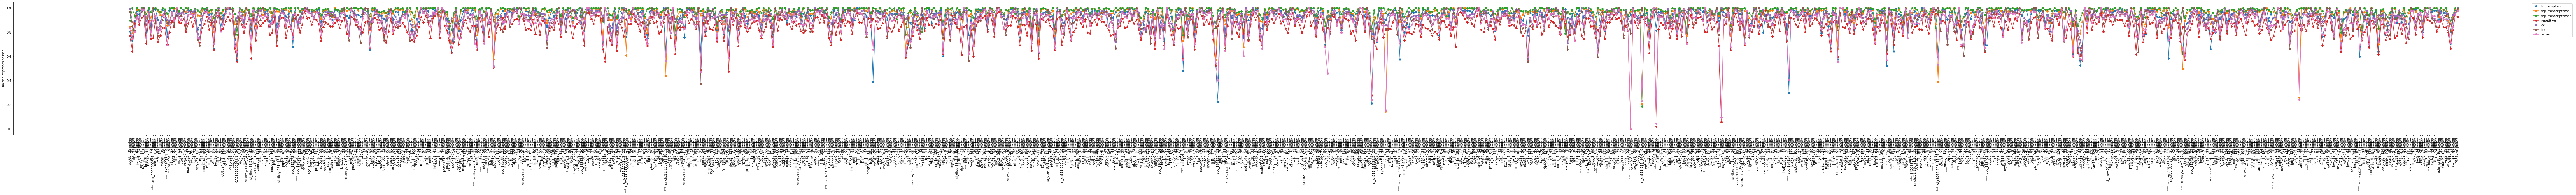

In [9]:
nprobes = []
for pbr_fl in pbr_files:
    name= os.path.basename(pbr_fl).split('_ENSDARG')[0]
    csv_fl = pbr_fl.replace('.pbr','.csv')
    if os.path.exists(csv_fl):
        npb = len([ln for ln in open(csv_fl,'r')][1:])
    else:
        npb=0
    print(name,npb)    
    nprobes.append(npb)

import matplotlib.pylab as plt
keys = dics[0].keys()
data_fracs = np.array([[dic[key] for dic in dics] for key in keys])
plt.figure(figsize=(150,8))
for data_,key in zip(data_fracs,keys):
    plt.plot(data_,'o-',label=key)
genes = [('***  ' if npb<20 else '') + os.path.basename(fl).split('_ENSDARG')[0]+' - '+str(npb)+' probes' 
         for fl,npb in zip(pbr_files,nprobes)]
plt.xticks(np.arange(len(genes)),genes,rotation='90')
plt.ylabel("Fraction of probes passed")
plt.legend()
plt.show()

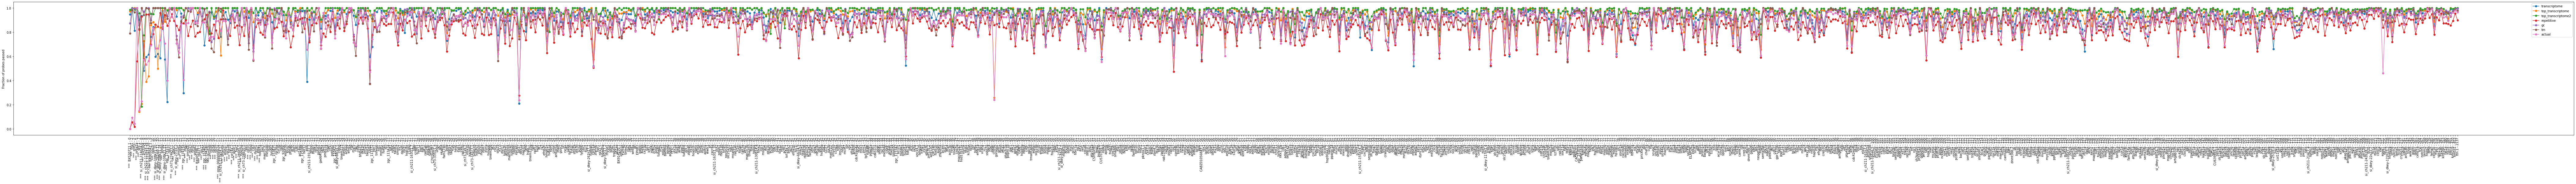

In [10]:
import matplotlib.pylab as plt
ipbs = np.argsort(nprobes)[:]
keys = dics[0].keys()
data_fracs = np.array([[dic[key] for dic in dics] for key in keys])
data_fracs = data_fracs[:,ipbs]
plt.figure(figsize=(150,8))
for data_,key in zip(data_fracs,keys):
    plt.plot(data_,'o-',label=key)
genes = [('***  ' if npb<20 else '') + os.path.basename(fl).split('_ENSDARG')[0]+' - '+str(npb) 
         for fl,npb in zip(np.array(pbr_files)[ipbs],np.array(nprobes)[ipbs])]
plt.xticks(np.arange(len(np.array(genes))),np.array(genes),rotation='90')
plt.ylabel("Fraction of probes passed")
plt.legend()
plt.show()

In [11]:
for i,pbr_fl in enumerate(pbr_files):
    if nprobes[i]==0:
        print(os.path.basename(pbr_fl).split('_ENSDARG')[0])

BX530721.1


In [12]:
few_probes = [os.path.basename(fl).split('.')[0] for fl in np.array(pbr_files)[ipbs][np.array(nprobes)[ipbs]<30]]

In [13]:
os.path.basename(in_files[0]).split('.')[0]

'pou5f3_ENSDARG00000044774'

Most genes have 20 probes

In [15]:
out_files = glob.glob(r'.\Lib1000\single_genes_ENSDARG\*.csv')

import numpy as np
def read_target_seqs(fl):
    txts = np.array([ln.replace('\n','').split(',') for ln in open(fl,'r') if len(ln)>2][1:])
    seqs = np.array([txt.replace("'",'')[1:] for txt in txts[:,0]])
    names = txts[:,1]
    return names,seqs
dic_npbs ={}
for out_fl in out_files:
    names,seqs = read_target_seqs(out_fl)
    nm_gn = os.path.basename(names[0]).split('_pb')[0]
    #print(nm_gn,len(seqs))
    dic_npbs[nm_gn]=len(seqs)

gns = list(dic_npbs.keys())
igns = np.argsort([dic_npbs[gn] for gn in gns])
print(list(zip(np.array(gns)[igns],np.array([dic_npbs[gn] for gn in gns])[igns])))

[('thy1_ENSDARG00000035018', 2), ('znfl1i_ENSDARG00000079126', 2), ('nr6a1a_ENSDARG00000096224', 5), ('si_ch211-114n24', 8), ('si_ch211-113a14', 8), ('znf1004_ENSDARG00000110008', 8), ('BX005043', 9), ('rplp2l_ENSDARG00000011201', 10), ('si_dkey-261m9', 10), ('si_dkey-108k21', 11), ('si_dkey-27i16', 12), ('zgc_174153_ENSDARG00000079376', 12), ('ube2c_ENSDARG00000101618', 12), ('snrpd1_ENSDARG00000011648', 12), ('rps15_ENSDARG00000070849', 12), ('si_ch73-274k23', 12), ('snrpg_ENSDARG00000099667', 12), ('mgp_ENSDARG00000086189', 13), ('snrpf_ENSDARG00000105037', 13), ('zgc_174154_ENSDARG00000075527', 13), ('rps23_ENSDARG00000021838', 14), ('snrpd3l_ENSDARG00000076283', 14), ('rpl26_ENSDARG00000102317', 14), ('BX005396', 14), ('rps27', 14), ('snrpd3_ENSDARG00000013800', 14), ('zgc_194246_ENSDARG00000092889', 15), ('zgc_153405_ENSDARG00000096992', 15), ('rps21_ENSDARG00000025850', 15), ('dynll2b_ENSDARG00000005172', 15), ('rpl38_ENSDARG00000006413', 16), ('rpl34_ENSDARG00000029500', 16), (

In [17]:
out_files = glob.glob(r'.\Lib1000\single_genes_ENSDARG\*.csv')

In [19]:
import numpy as np
def read_target_seqs(fl):
    txts = np.array([ln.replace('\n','').split(',') for ln in open(fl,'r') if len(ln)>2][1:])
    seqs = np.array([txt.replace("'",'')[1:] for txt in txts[:,0]])
    names = txts[:,1]
    return names,seqs
out_fl = out_files[0]
names,seqs = read_target_seqs(out_fl)
nm_gn = os.path.basename(names[0]).split('_pb')[0]

In [20]:
names

array(['si_ch211-163l21_pb_0', 'si_ch211-163l21_pb_94',
       'si_ch211-163l21_pb_134', 'si_ch211-163l21_pb_174',
       'si_ch211-163l21_pb_214', 'si_ch211-163l21_pb_254',
       'si_ch211-163l21_pb_294', 'si_ch211-163l21_pb_334',
       'si_ch211-163l21_pb_374', 'si_ch211-163l21_pb_418',
       'si_ch211-163l21_pb_458', 'si_ch211-163l21_pb_498',
       'si_ch211-163l21_pb_558', 'si_ch211-163l21_pb_598',
       'si_ch211-163l21_pb_644', 'si_ch211-163l21_pb_684',
       'si_ch211-163l21_pb_724', 'si_ch211-163l21_pb_764',
       'si_ch211-163l21_pb_804', 'si_ch211-163l21_pb_844',
       'si_ch211-163l21_pb_884', 'si_ch211-163l21_pb_924',
       'si_ch211-163l21_pb_964', 'si_ch211-163l21_pb_1004',
       'si_ch211-163l21_pb_1044', 'si_ch211-163l21_pb_1084',
       'si_ch211-163l21_pb_1124', 'si_ch211-163l21_pb_1179',
       'si_ch211-163l21_pb_1219', 'si_ch211-163l21_pb_1259',
       'si_ch211-163l21_pb_1316', 'si_ch211-163l21_pb_1358',
       'si_ch211-163l21_pb_1398', 'si_ch211-163l21

### Design introns - Not implemented for this dataset

#### Downloaded the following from biomart into file: forIntrons.fasta

Attributes
Gene stable ID
Gene stable ID version
Transcript stable ID
Transcript stable ID version
Unspliced (Gene)
Exon region start (bp)
Exon region end (bp)
Gene name
Chromosome/scaffold name
Gene start (bp)
Gene end (bp)

In [ ]:
WNT11	ENSDARG00000004256
FGF8A	ENSDARG00000003399
ta	ENSDARG00000101576
gsc	ENSDARG00000059073
FOXI1	ENSDARG00000104566
szl	ENSDARG00000099637
BAMBIA	ENSDARG00000055381


### Mask the exons and keep the introns - Not implemented in this dataset

In [156]:
names,seqs = lt.fastaread(r'C:\Users\Bogdan\Dropbox\SchierLab\SeqLibrary\forIntrons.fasta')
startsE = [np.array(nm.split('|')[-6].split(';'),dtype=int) for nm in names]
endsE = [np.array(nm.split('|')[-5].split(';'),dtype=int) for nm in names]
starts = [int(nm.split('|')[-2]) for nm in names]
introns = []
for st, stsE,esE,sq,nm  in zip(starts,startsE,endsE,seqs,names):
    sq_ = np.array(list(sq))
    
    for sE,eE in zip(stsE,esE):
        #print(sE-st)
        sq_[(sE-st):(eE-st)]='N'
    sq_ = ''.join(sq_)
    sqIs=[sq__ for sq__ in sq_.split('N') if len(sq__)>1]
    introns.append(sqIs)

for intron,nm in zip(introns,names):
    fldsave = r'C:\Users\Bogdan\Dropbox\SchierLab\SeqLibrary\introns'
    nm_ = nm.split('|')[-4]
    fl = fldsave+os.sep+nm_+'.fasta'
    intron_ = 'N'.join(intron)
    if len(intron_)>0:
        lt.fastawrite(fl,[nm],[intron_])
        print(fl)

C:\Users\Bogdan\Dropbox\SchierLab\SeqLibrary\introns\gsc.fasta
C:\Users\Bogdan\Dropbox\SchierLab\SeqLibrary\introns\szl.fasta
C:\Users\Bogdan\Dropbox\SchierLab\SeqLibrary\introns\bambia.fasta
C:\Users\Bogdan\Dropbox\SchierLab\SeqLibrary\introns\wnt11f2.fasta
C:\Users\Bogdan\Dropbox\SchierLab\SeqLibrary\introns\foxi1.fasta


### Check that the readouts/primers used are orthogonal to the genome/transcriptome

#### Construct 12bp count tables - only need to do it once

In [55]:
genome_fl = r'.\z11\GCF_000002035.6_GRCz11_genomic.fna'
ct = ld.countTable(word=12,save_file=genome_fl.replace('.fna','_12w.bin'),
                   sparse=False)
fl = genome_fl
names,seqs = lt.fastaread(fl)
from tqdm import tqdm
for sq in tqdm(seqs):
    ct.consume(sq.upper(),verbose=False)
ct.complete(verbose=True)
ct.save()

100%|██████████████████████████████████████████████████████████████████████████████| 1923/1923 [06:57<00:00,  4.61it/s]


Time to compute unique and clip: 222.5777289867401
Time to update matrix: 0.05505013465881348


In [345]:
genome_fl = r'C:\Users\Bogdan\Dropbox\SchierLab\z11\zebrafish_GRCz11_genesUnspliced_top3000_50p-epiboly.fasta'
ct = ld.countTable(word=12,save_file=genome_fl.replace('.fasta','_12w.bin'),
                   sparse=False)
fl = genome_fl
names,seqs = lt.fastaread(fl)
from tqdm import tqdm
for sq in tqdm(seqs[:]):
    ct.consume(sq.upper(),verbose=False)
ct.complete(verbose=True)
ct.save()

100%|█████████████████████████████████████████████████████████████████████████████| 2933/2933 [00:13<00:00, 213.18it/s]


Time to compute unique and clip: 7.568893909454346
Time to update matrix: 0.03803420066833496


#### Load tables

In [11]:
genome_fl = r'U:\Scientific Data\RG-AS04-Data01\seqFISH\Code\ProbeDesigning\z11\GCF_000002035.6_GRCz11_genomic_12w.bin'
#genome_fl = r'C:\Users\Bogdan\Dropbox\SchierLab\z11\zebrafish_GRCz11_genesUnspliced_top3000_50p-epiboly.fasta'
ct_gn = ld.countTable(word=12,save_file=genome_fl.replace('.fasta','_12w.bin').replace('.fna','_12w.bin'),
                   sparse=False)
ct_gn.load()

tr_fl = r'U:\Scientific Data\RG-AS04-Data01\seqFISH\Code\ProbeDesigning\z11\zebrafish_GRCz11_genesUnspliced_top3000_50p-epiboly_12w.bin'
ct_tr = ld.countTable(word=12,save_file=tr_fl.replace('.fasta','_12w.bin').replace('.fna','_12w.bin'),
                   sparse=False)
ct_tr.load()

In [220]:
#ct.get(Rs[0])

#### Load PCR primers

In [244]:
pcr_primers = np.array([ln.replace('\n','').split(',') for ln in open(r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\Readouts\PCR_primers - pcr.csv','r') if len(ln)>2][1:])

In [245]:
import numpy as np
txts = [ln.replace('\n','').split(',') for ln in open(r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\Readouts\NDB_brightness2.csv','r') if len(ln)>2]
head = txts[0]
txts = np.array(txts)[1:]
ndbs_info = np.array([r for r1,r2,r3 in zip(txts[txts[:,1]=='750'],txts[txts[:,1]=='647'],txts[txts[:,1]=='561']) for r in [r1,r2,r3]])

In [223]:
#pcr_primers[5] -bad

In [247]:
import numpy as np
cnames,cseqs = lt.fastaread(r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\Readouts\final_candidate_readouts_v2.fasta')
cnames = [nm.replace('bc25mer','bcm')for nm in cnames]
def read_target_seqs(fl):
    txts = np.array([ln.replace('\n','').split(',') for ln in open(fl,'r') if len(ln)>2][1:])
    seqs = np.array([txt.replace("'",'')[1:] for txt in txts[:,0]])
    names = txts[:,1]
    return names,seqs

Text(0.5, 0, 'PCR primers')

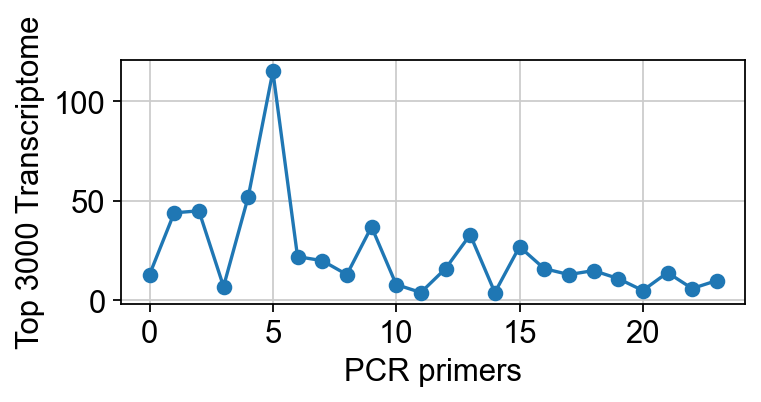

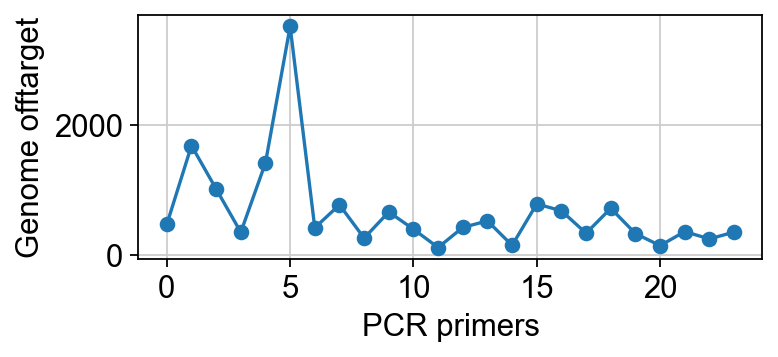

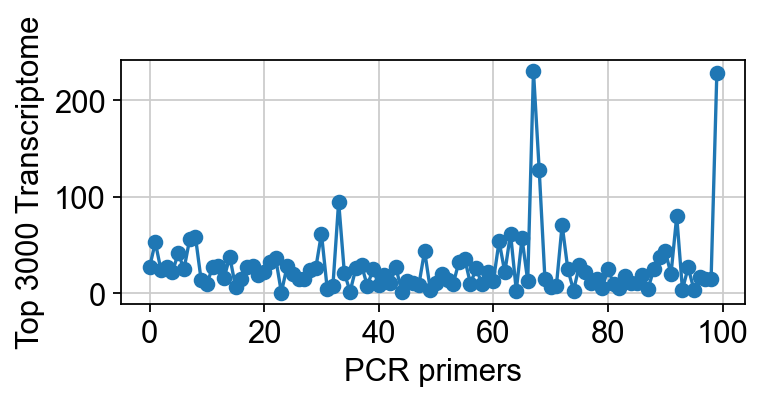

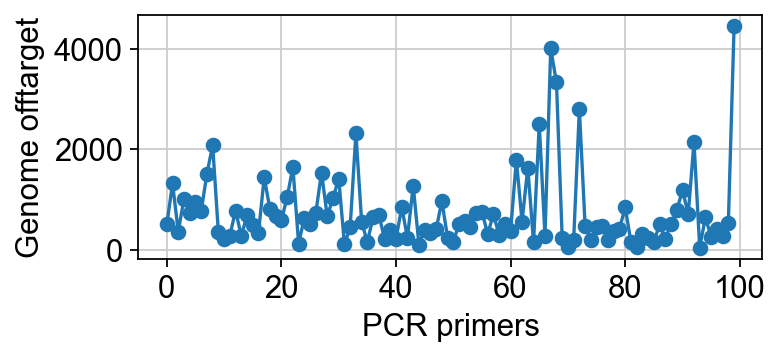

In [239]:
Rs = ndbs_info[:,-1][:100]
pcrs = [pr[-20:] for _,pr in pcr_primers]
offts = np.array([[ct.get(R)+ct.get(lt.seqrc(R)) for R in pcrs] for ct in [ct_tr,ct_gn]]).T

#print(np.any(offts>np.median(offts)*5))

plt.figure(figsize=(5,2))
plt.plot(offts[:,0],'o-')
plt.ylabel('Top 3000 Transcriptome')
plt.xlabel('PCR primers')
plt.figure(figsize=(5,2))
plt.plot(offts[:,1],'o-')
plt.ylabel('Genome offtarget')
plt.xlabel('PCR primers')


offts = np.array([[ct.get(R)+ct.get(lt.seqrc(R)) for R in Rs] for ct in [ct_tr,ct_gn]]).T

#print(np.any(offts>np.median(offts)*5))

plt.figure(figsize=(5,2))
plt.plot(offts[:,0],'o-')
plt.ylabel('Top 3000 Transcriptome')
plt.xlabel('PCR primers')
plt.figure(figsize=(5,2))
plt.plot(offts[:,1],'o-')
plt.ylabel('Genome offtarget')
plt.xlabel('PCR primers')

Text(0.5, 0, 'PCR primers')

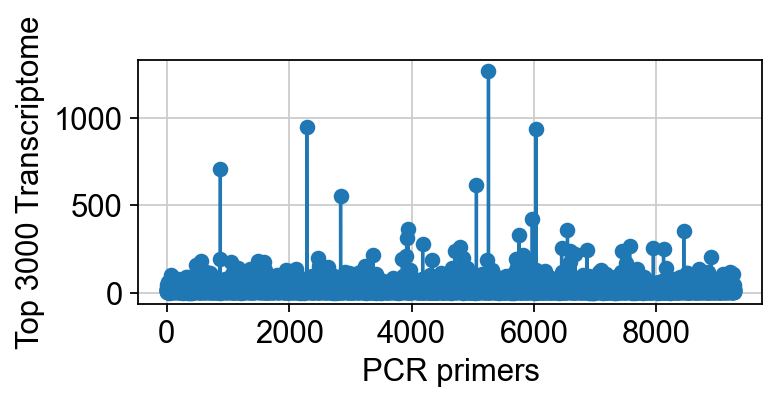

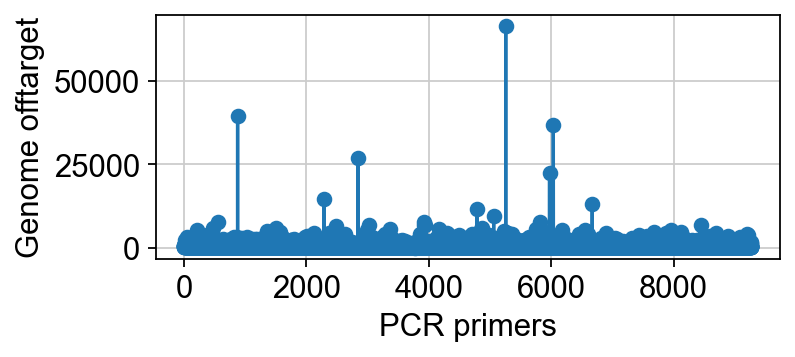

In [248]:
offts = np.array([[ct.get(R)+ct.get(lt.seqrc(R)) for R in cseqs] for ct in [ct_tr,ct_gn]]).T

#print(np.any(offts>np.median(offts)*5))

plt.figure(figsize=(5,2))
plt.plot(offts[:,0],'o-')
plt.ylabel('Top 3000 Transcriptome')
plt.xlabel('PCR primers')
plt.figure(figsize=(5,2))
plt.plot(offts[:,1],'o-')
plt.ylabel('Genome offtarget')
plt.xlabel('PCR primers')

In [262]:
keep_reads2 = np.all(offts<np.percentile(offts,90,axis=0),axis=-1)
cseqs_kp = np.array(cseqs)[keep_reads2]
cnames_kp = np.array(cnames)[keep_reads2]
lt.fastawrite(r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\Readouts\final_candidate_readouts_zebrafish.fasta',
             cnames_kp,cseqs_kp)

Text(0.5, 0, 'PCR primers')

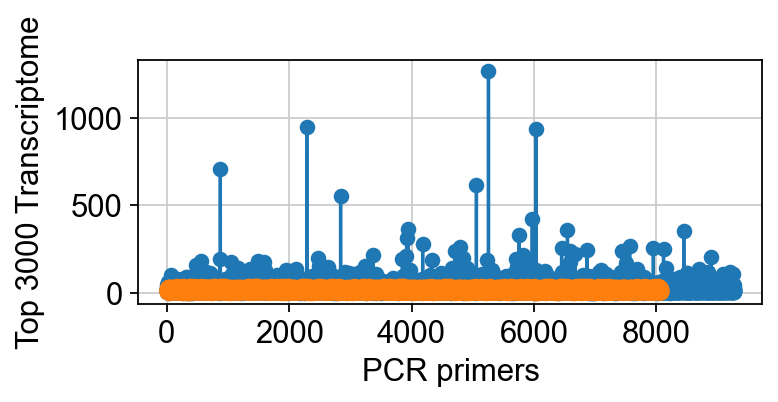

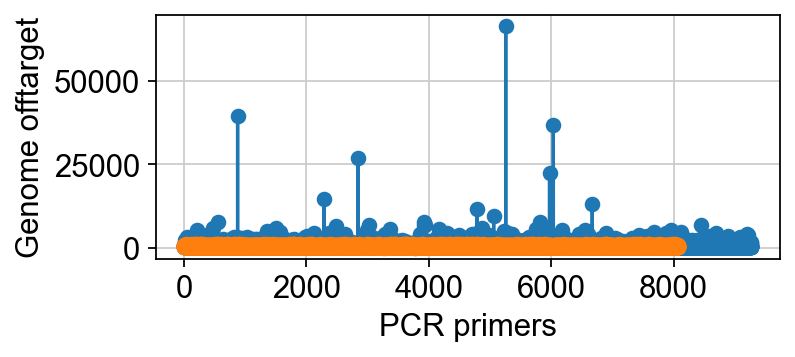

In [259]:
plt.figure(figsize=(5,2))
plt.plot(offts[:,0],'o-')
plt.plot(offts[keep_reads2,0],'o-')
plt.ylabel('Top 3000 Transcriptome')
plt.xlabel('PCR primers')
plt.figure(figsize=(5,2))
plt.plot(offts[:,1],'o-')
plt.plot(offts[keep_reads2,1],'o-')
plt.ylabel('Genome offtarget')
plt.xlabel('PCR primers')

### Sequential library

In [16]:
import sys,os,glob
sys.path.append(os.path.abspath(r'LibraryDesign3'))
import LibraryDesigner as ld
import LibraryTools as lt
from seqint import seq2Int, seq2Int_rc
# some other packages may required
import Bio #use pip install biopython
import numpy as np
def read_target_seqs(fl):
    txts = np.array([ln.replace('\n','').split(',') for ln in open(fl,'r') if len(ln)>2][1:])
    seqs = np.array([txt.replace("'",'')[1:] for txt in txts[:,0]])
    names = txts[:,1]
    return names,seqs



out_files = glob.glob(r'.\Lib1000\single_genes_ENSDARG\*.csv')
dic_npbs ={}
for out_fl in out_files:
    names,seqs = read_target_seqs(out_fl)
    nm_gn = os.path.basename(names[0]).split('_pb')[0]
    #print(nm_gn,len(seqs))
    dic_npbs[nm_gn]=len(seqs)

gns = list(dic_npbs.keys())
igns = np.argsort([dic_npbs[gn] for gn in gns])
print(list(zip(np.array(gns)[igns],np.array([dic_npbs[gn] for gn in gns])[igns])))

[('thy1_ENSDARG00000035018', 2), ('znfl1i_ENSDARG00000079126', 2), ('nr6a1a_ENSDARG00000096224', 5), ('znf1004_ENSDARG00000110008', 8), ('si_ch211-114n24', 8), ('si_ch211-113a14', 8), ('BX005043', 9), ('rplp2l_ENSDARG00000011201', 10), ('si_dkey-261m9', 10), ('si_dkey-108k21', 11), ('si_ch73-274k23', 12), ('ube2c_ENSDARG00000101618', 12), ('snrpd1_ENSDARG00000011648', 12), ('si_dkey-27i16', 12), ('rps15_ENSDARG00000070849', 12), ('snrpg_ENSDARG00000099667', 12), ('zgc_174153_ENSDARG00000079376', 12), ('mgp_ENSDARG00000086189', 13), ('snrpf_ENSDARG00000105037', 13), ('zgc_174154_ENSDARG00000075527', 13), ('snrpd3l_ENSDARG00000076283', 14), ('BX005396', 14), ('rps27', 14), ('rpl26_ENSDARG00000102317', 14), ('snrpd3_ENSDARG00000013800', 14), ('rps23_ENSDARG00000021838', 14), ('dynll2b_ENSDARG00000005172', 15), ('zgc_153405_ENSDARG00000096992', 15), ('zgc_194246_ENSDARG00000092889', 15), ('rps21_ENSDARG00000025850', 15), ('rpl38_ENSDARG00000006413', 16), ('rpl34_ENSDARG00000029500', 16), (

In [3]:
cnames,cseqs = lt.fastaread(r'.\Readouts\final_candidate_readouts_zebrafish.fasta')

In [10]:
pcr_primers = np.array([ln.replace('\n','').split(',') for ln in open(r'C:\Users\Bogdan\Dropbox\ChrisGlass_Project\readouts_primers\PCR_primers - pcr.csv','r') if len(ln)>2][1:])
pcr_primers

array([['W1A01_primer_0', 'CGGCTCGCAGCGTGTAAACG'],
       ['W1A02_primer_1', 'TAATACGACTCACTATAGGGCATTTCAGGATCACCGGCGG'],
       ['W1A03_primer_2', 'CCCGCAATGGCTGACAACCG'],
       ['W1A04_primer_3', 'TAATACGACTCACTATAGGGCGTTGTATGCCCTCCACGC'],
       ['W1A05_primer_4', 'CATTCAGCATTGCGCAACGG'],
       ['W1A06_primer_5', 'TAATACGACTCACTATAGGGTCTTCCCGCAAATGCACCG'],
       ['W1A07_primer_6', 'CGCAAACTGGTGCGGAAGGC'],
       ['W1A08_primer_7', 'TAATACGACTCACTATAGGGCCCTTTCGCGCTGCATCGAC'],
       ['W1A09_primer_8', 'TTGTTGAGGCGGCGGAAGTC'],
       ['W1A10_primer_9', 'TAATACGACTCACTATAGGGATTGCCGCATGGTTTCCG'],
       ['W1A11_primer_10', 'TTGCTAGCGTGGGCCAATCG'],
       ['W1A12_primer_11', 'TAATACGACTCACTATAGGGCCATTGCCCGCGAGGTCGAG'],
       ['W1B01_primer_12', 'TTGGGCGTGCACGTCAATTC'],
       ['W1B02_primer_13', 'TAATACGACTCACTATAGGGCAATTAATCGCCCGGTGCCA'],
       ['W1B03_primer_14', 'GACATCCAGGCGCGGACAAC'],
       ['W1B04_primer_15', 'TAATACGACTCACTATAGGGCTTGTGCATCGCGCCAAAGA'],
       ['W1B05_primer_

In [18]:
nmA_,A = ['W1B03_primer_14', 'GACATCCAGGCGCGGACAAC']
nmB_,B = ['W1B08_primer_19', 'TAATACGACTCACTATAGGGCATGTGTCACCGCTCCGTGG']

nmA_ = nmA_.split('_')[0]
nmB_ = nmB_.split('_')[0]
B = lt.seqrc(B[-20:])

nmax = 60
iNDB = 500 #make sure the linkers are orthogonal to Jakob's library
lib_names,lib_seqs=[],[]

files_ = glob.glob(r'.\Lib1000\single_genes_ENSDARG\*.csv')
print("Found number of genes:",len(files_))
for fl in files_:
    names,seqs = read_target_seqs(fl)
    if ("pou5f3" in names[0]) or ("actb2" in names[0]): #house keeping genes get even and odd probes
        print(names[0])
        names = names[:nmax]
        seqs = seqs[:nmax]       
        ndb_sqs = [cseqs[iNDB],cseqs[iNDB+1]]
        ndb_nms = [cnames[iNDB],cnames[iNDB+1]]
        
        tag = nmA_+'--'+nmB_+'__'
        seqs = [lt.up_down([A,ndb_sqs[isq%2],lt.seqrc(sq),ndb_sqs[isq%2],ndb_sqs[isq%2],B]) for isq,sq in enumerate(seqs)]
        names = [tag+ndb_nms[isq%2]+'__'+nm for isq,nm in enumerate(names)]
        iNDB+=2
        lib_names.extend(names)
        lib_seqs.extend(seqs)
    elif len(seqs)>=5:
        names = names[:nmax]
        seqs = seqs[:nmax]
        
        #changed to have one probe set for each gene
        #ndb_sqs = [cseqs[2*iNDB],cseqs[2*iNDB+1]]
        #ndb_nms = [cnames[2*iNDB],cnames[2*iNDB+1]]
        
        ndb_sqs = cseqs[iNDB]
        ndb_nms = cnames[iNDB]

        tag = nmA_+'--'+nmB_+'__'
        #seqs = [lt.up_down([A,ndb_sqs[isq%2],lt.seqrc(sq),ndb_sqs[isq%2],ndb_sqs[isq%2],B]) for isq,sq in enumerate(seqs)]
        #names = [tag+ndb_nms[isq%2]+'__'+nm for isq,nm in enumerate(names)]
        seqs = [lt.up_down([A,ndb_sqs,lt.seqrc(sq),ndb_sqs,ndb_sqs,B]) for sq in seqs]
        names = [tag+ndb_nms+'__'+nm for nm in names]
        iNDB+=1
        lib_names.extend(names)
        lib_seqs.extend(seqs)

Found number of genes: 997
pou5f3_ENSDARG00000044774_pb_4
actb2_ENSDARG00000037870_pb_0


In [ ]:
lt.fastawrite(r'.\Lib1000\ASYW_M2.fasta',lib_names,lib_seqs)

In [24]:
iNDB

1497

In [3]:
import sys,os,glob
sys.path.append(os.path.abspath(r'LibraryDesign3'))
import LibraryDesigner as ld
import LibraryTools as lt
from seqint import seq2Int, seq2Int_rc
# some other packages may required
import Bio #use pip install biopython
import numpy as np

import glob,os

U:\Scientific Data\RG-AS04-Data01\seqFISH\Code\ProbeDesigning\LibraryDesign3\C_Tools


In [2]:
names,seqs = lt.fastaread(r'.\Lib1000\ASYW_M2.fasta')

In [3]:
len(names)

48658

In [7]:
lib_names,lib_seqs = lt.fastaread(r'.\Lib1000\ASYW_M2.fasta')

In [8]:
### Check number of probes

print(len(lib_names),len(lib_seqs))

48658 48658


In [9]:

### Check primer counts
np.unique([sq[:20]+sq[-20:]+nm.split('_')[0] for nm,sq in zip(lib_names,lib_seqs)],return_counts=True)


(array(['GACATCCAGGCGCGGACAACccacggagcggtgacacatgW1B03--W1B08'],
       dtype='<U52'),
 array([48658], dtype=int64))

In [ ]:
### Blast a probe on ncbi

In [10]:
!{os.path.abspath(r'.\Lib1000\ASYW_M2.fasta')}

In [ ]:
>W1B03--W1B08__bcm_6730__shroom3_ENSDARG00000102180_pb_1746
GACATCCAGGCGCGGACAACagtcttctcgccaggttgtaCGTAAACTGAATCAACAGAATACCTTTGCCTCTCTCCTCTagtcttctcgccaggttgtaAGTCTTCTCGCCAGGTTGTAccacggagcggtgacacatg



Danio rerio shroom family member 3 (shroom3), mRNA
Sequence ID: NM_001278851.1Length: 5887Number of Matches: 1
Related Information
Gene-associated gene details
Genome Data Viewer-aligned genomic context
Range 1: 1639 to 1678GenBankGraphicsNext MatchPrevious Match
Alignment statistics for match #1
Score	Expect	Identities	Gaps	Strand
75.0 bits(40)	9e-14	40/40(100%)	0/40(0%)	Plus/Minus
Query  1     CGTAAACTGAATCAACAGAATACCTTTGCCTCTCTCCTCT  40
             ||||||||||||||||||||||||||||||||||||||||
Sbjct  1678  CGTAAACTGAATCAACAGAATACCTTTGCCTCTCTCCTCT  1639

In [12]:
genome_fl = r'U:\Scientific Data\RG-AS04-Data01\seqFISH\Code\ProbeDesigning\z11\GCF_000002035.6_GRCz11_genomic_12w.bin'
#genome_fl = r'C:\Users\Bogdan\Dropbox\SchierLab\z11\zebrafish_GRCz11_genesUnspliced_top3000_50p-epiboly.fasta'
ct_gn = ld.countTable(word=12,save_file=genome_fl.replace('.fasta','_12w.bin').replace('.fna','_12w.bin'),
                   sparse=False)
ct_gn.load()

tr_fl = r'U:\Scientific Data\RG-AS04-Data01\seqFISH\Code\ProbeDesigning\z11\zebrafish_GRCz11_genesUnspliced_top3000_50p-epiboly_12w.bin'
ct_tr = ld.countTable(word=12,save_file=tr_fl.replace('.fasta','_12w.bin').replace('.fna','_12w.bin'),
                   sparse=False)
ct_tr.load()

In [13]:
offts = np.array([[ct.get(R)+ct.get(lt.seqrc(R)) for R in lib_seqs] for ct in [ct_tr,ct_gn]]).T

Text(0.5, 0, 'readouts')

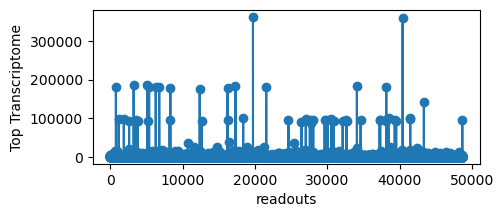

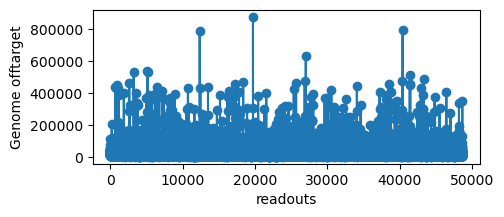

In [16]:
import matplotlib.pylab as plt
plt.figure(figsize=(5,2))
plt.plot(offts[:,0],'o-')
plt.ylabel('Top Transcriptome')
plt.xlabel('readouts')
plt.figure(figsize=(5,2))
plt.plot(offts[:,1],'o-')
plt.ylabel('Genome offtarget')
plt.xlabel('readouts')


In [47]:
keep = (offts[:,0]<3000)&(offts[:,1]<200000)
print(np.sum(keep))

47870


Text(0.5, 0, 'readouts')

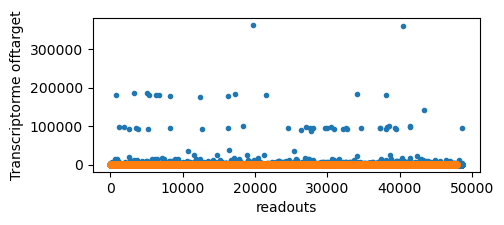

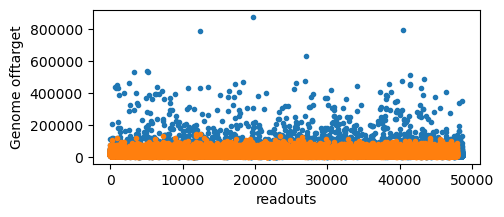

In [38]:
plt.figure(figsize=(5,2))
plt.plot(offts[:,0],'.')
plt.plot(offts[keep,0],'.')
plt.ylabel('Transcriptorme offtarget')
plt.xlabel('readouts')

plt.figure(figsize=(5,2))
plt.plot(offts[:,1],'.')
plt.plot(offts[keep,1],'.')
plt.ylabel('Genome offtarget')
plt.xlabel('readouts')

In [4]:
lib_names,lib_seqs = lt.fastaread(r'.\Lib1000\ASYW_M2.fasta')
gns,cts  =np.unique([nm.split('__')[-1].split('_pb')[0]for nm in np.array(lib_names)[keep]],return_counts=True)
dic_counts_keep = {gn:ct for gn,ct in zip(gns,cts)}
gns,cts  =np.unique([nm.split('__')[-1].split('_pb')[0]for nm in np.array(lib_names)[~keep]],return_counts=True)
dic_counts_nokeep = {gn:ct for gn,ct in zip(gns,cts)}

print(np.max([dic_counts_nokeep[gn]/(dic_counts_nokeep[gn]+dic_counts_keep[gn]) for gn in dic_counts_nokeep]))
### The fraction of probes discarded for the most affected gene upon filtering the probes.

NameError: name 'keep' is not defined

In [39]:
lt.fastawrite(r'.\Lib1000\ASYW_M2_v2.fasta',np.array(lib_names)[keep],np.array(lib_seqs)[keep])

In [5]:
lib_names,lib_seqs = lt.fastaread(r'.\Lib1000\ASYW_M2_v2.fasta')

In [51]:
used_primers = list(np.unique([sq_ for sq in lib_seqs for sq_ in [sq[:20],sq[-20:]]]))
from tqdm.notebook import tqdm
dists = [[lt.simmilar(prm.upper(),sq.upper(),val=13)for prm in used_primers] for sq in tqdm(lib_seqs)]
dists = np.array(dists)

#np.unique(dists,return_counts=True)
np.unique(dists,return_counts=True)

sdist = np.sum(dists,axis=-1)
keep = sdist==np.min(sdist)

  0%|          | 0/47870 [00:00<?, ?it/s]

In [59]:
print("Screened out internal PCR priming probes:",np.sum(~keep))

lt.fastawrite(r'.\Lib1000\ASYW_M2_v3.fasta',np.array(lib_names)[keep],np.array(lib_seqs)[keep])

Screened out internal PCR priming probes: 2


In [6]:
lib_names,lib_seqs = lt.fastaread(r'.\Lib1000\ASYW_M2_v3.fasta')

In [7]:
gns,cts = np.unique([nm.split('_pb')[:-1] for nm in lib_names],return_counts=True)

E:\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


In [8]:
np.sum(cts<10)

6

In [65]:
np.sort(cts)

array([ 5,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16,
       16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 19,
       19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21,
       21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25,
       25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30,
       30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
       34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35,
       35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36,
       36, 36, 36, 36, 37

In [9]:
nm_prevs = []
gn_prevs = []
adts_names,adts_seqs = [],[]
ign = -1
tails = ['TTTGCACTGCCGTCCTTGACTTTGCACTGCCGTCCTTGAC','GATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC','TGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA']
nm_tails = ['-2xStv_82rc','-2xStv_1rc','-2xStv_79rc']
nm_tails = ['Stv1','Stv79']
tails = ['GATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC','TGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA']
for nm,sq in zip(lib_names,lib_seqs):
    pcr,bcm,gn = nm.split('__')
    gn = gn.split('_pb')[0]
    nm_ = bcm+'__'+gn
    
        
    if gn not in gn_prevs:
        ign+=1
    if nm_ not in nm_prevs:
        nm_prevs.append(nm_)
        sq__,nm__ = tails[ign%len(tails)],nm_tails[ign%len(tails)]
        print(nm_+'--'+nm__+', '+lt.seqrc(sq[20:40])+sq__)
        adts_names.append(nm_+'--'+nm__)
        adts_seqs.append(lt.seqrc(sq[20:40])+sq__)
        gn_prevs.append(gn)

bcm_3412__si_ch211-163l21--Stv1, ttaacgacgtaaccagctcaGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_3419__fadd_ENSDARG00000103021--Stv79, aacgtgggcgctattggaatTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_3420__kita_ENSDARG00000043317--Stv1, gccgcagtctaacgtcaaatGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_3422__mcm4_ENSDARG00000040041--Stv79, ggtcagtataccccgaagacTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_3428__rbm7_ENSDARG00000020841--Stv1, agtagcaaccgcgtcagtaaGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_3434__mylipa_ENSDARG00000008859--Stv79, tcaccacgacaatagctgtcTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_3436__tmed9_ENSDARG00000004261--Stv1, gcgtggacgcagtatccatcGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_3446__fn1b_ENSDARG00000006526--Stv79, acagagcatcgtcacccgacTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_3450__dock5_ENSDARG00000001968--Stv1, gaggtgactgcggacacatcGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_3454__vcana_ENSDARG00000103515--Stv79, aggatcagtacgacccaggaTGCGAACTGTCCGGCTTTC

bcm_8186__tmed2_ENSDARG00000026908--Stv1, agctacgtgctaacgtaaacGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_8189__BX914220--Stv79, gtccgctgcgcaggaagataTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_8196__mgst3b_ENSDARG00000033364--Stv1, caaaacgtacgtactccccaGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_8198__insrb_ENSDARG00000071524--Stv79, actgcatcgactaaccgagcTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_8201__actn4_ENSDARG00000099786--Stv1, aatctgacggcacccagagtGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_8205__meis1b_ENSDARG00000012078--Stv79, cagagcaacaatcgcctaatTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_8218__tcf7l2_ENSDARG00000004415--Stv1, tggtacgacgattcaatgccGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_8221__nanog_ENSDARG00000075113--Stv79, agcccgtaaagacgattaatTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_8229__si_dkey-27i16--Stv1, cgattagatccaccgccgacGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_8233__meis2a_ENSDARG00000098240--Stv79, caacgaagattccggctccaTGCGAACTGTCCGGCTTTCATGCGAACTG

bcm_9352__enox2_ENSDARG00000078942--Stv1, cccgtaggtttccgaacacaGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_9354__ctnnal1_ENSDARG00000018162--Stv79, cccatagcggatgtacacggTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_9357__inpp5b_ENSDARG00000103683--Stv1, tccccgagacgatagcctatGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_9358__nkd1_ENSDARG00000020053--Stv79, gtttcgcgcatattaggcacTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA


In [79]:
!pip install pandas --upgrade

     --------------------------------------- 10.9/10.9 MB 93.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'E:\\Anaconda3\\Lib\\site-packages\\~andas\\_libs\\algos.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [80]:
!pip install xlwt

     ---------------------------------------- 100.0/100.0 kB ? eta 0:00:00


In [81]:
import os
import pandas

well_pos = [let+str(i+1) for let in 'ABCDEFGHIJKLMNOP' for i in range(24)]
seqsPlate,namesPlate = adts_seqs,adts_names
nplates = int(np.ceil(len(namesPlate)/384))
iplate = 0
tag = 'ASYW2'
for iplate in range(nplates):
    data = [[well_pos[ign%len(well_pos)],nm,sq]for ign,(sq,nm) in enumerate(zip(seqsPlate,namesPlate))][iplate*384:(iplate+1)*384]
    plate_n = pandas.DataFrame(data,columns=['Well Position','Name','Sequence'])    
    if not os.path.exists(r'./Lib1000/IDT_384_plates'):os.makedirs(r'./Lib1000/IDT_384_plates')
    plate_n.to_excel(r'./Lib1000/IDT_384_plates'+os.sep+tag+'_P'+str(iplate+1)+'.xls',index=False,sheet_name=tag+'_P'+str(iplate+1))


C:\Users\wan0000\AppData\Local\Temp\ipykernel_9264\2862455682.py:13: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  plate_n.to_excel(r'./Lib1000/IDT_384_plates'+os.sep+tag+'_P'+str(iplate+1)+'.xls',index=False,sheet_name=tag+'_P'+str(iplate+1))
C:\Users\wan0000\AppData\Local\Temp\ipykernel_9264\2862455682.py:13: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.wri

In [16]:
import pandas as pd
fl = r'E:/Molecular_Trajectories/LibraryDesign/Lib1000/library_design_1000genes_v2.xlsx'
lib1000 = pd.read_excel(fl)
lib1000

ID       pref.trans.ID  names.zv11       NAMES.zv10  \
0    ENSDARG00000058179  ENSDART00000063665      ackr3b           ACKR3B   
1    ENSDARG00000037870  ENSDART00000141737       actb2            ACTB2   
2    ENSDARG00000018968  ENSDART00000023094     acvr1ba          ACVR1BA   
3    ENSDARG00000056250  ENSDART00000078703       add3b            ADD3B   
4    ENSDARG00000039429  ENSDART00000159585        adka             ADKA   
..                  ...                 ...         ...              ...   
995  ENSDARG00000079376  ENSDART00000152635  zgc:174153       ZGC:174153   
996  ENSDARG00000092889  ENSDART00000136306  zgc:194246            SYCE3   
997  ENSDARG00000040971  ENSDART00000060037   zgc:92606        GABARAPL1   
998  ENSDARG00000035563  ENSDART00000051553      znf703           ZNF703   
999  ENSDARG00000079126  ENSDART00000114742      znfl1i  SI:DKEY-250I3.3   

     is.TF  is.landmark  is.morph  is.morph.CRISPR cell.type  is.top_1000  \
0    False        False      True             True       NaN         True   
1    False        False      True            False       NaN         True   
2    False        False      True            False       NaN         True   
3    False        False      True            False       NaN         True   
4    False        False     False            False       NaN         True   
..     ...          ...       ...              ...       ...          ...   
995  False        False     False            False       NaN         True   
996  False        False      True            False       NaN         True   
997  False        False      True            False       NaN         True   
998  False        False      True            False       NaN         True   
999  False        False     False            False       NaN         True   

     is.top_500  
0          True  
1          True  
2          True  
3          True  
4          True  
..          ...  
995       False  
996       False  
997       False  
998       False  
999       False  

[1000 rows x 11 columns]

In [75]:
tag = 'ASYW2'
for iplate in range(nplates):
    data = pd.read_excel(r'./Lib1000/IDT_384_plates'+os.sep+tag+'_P'+str(iplate+1)+'.xls')
    

3.0

In [ ]:




########## Check off targets
genome_fl = r'C:\Users\Bogdan\Dropbox\ChrisGlass_Project\mm10\allgenome_12w.bin'

ct_gn = ld.countTable(word=12,save_file=genome_fl.replace('.fasta','_12w.bin').replace('.fna','_12w.bin'),
                   sparse=False)
ct_gn.load()

tr_fl = r'C:\Users\Bogdan\Dropbox\ChrisGlass_Project\mm10_transcriptome\mouse_GRCm39_genesUnspliced_12w.bin'
ct_tr = ld.countTable(word=12,save_file=tr_fl.replace('.fasta','_12w.bin').replace('.fna','_12w.bin'),
                   sparse=False)
ct_tr.load()

offts = np.array([[ct.get(R)+ct.get(lt.seqrc(R)) for R in lib_seqs] for ct in [ct_tr,ct_gn]]).T

#print(np.any(offts>np.median(offts)*5))
import matplotlib.pylab as plt
plt.figure(figsize=(5,2))
plt.plot(offts[:,0],'o-')
plt.ylabel('Top Transcriptome')
plt.xlabel('readouts')
plt.figure(figsize=(5,2))
plt.plot(offts[:,1],'o-')
plt.ylabel('Genome offtarget')
plt.xlabel('readouts')


keep = offts[:,1]<250000


plt.figure(figsize=(5,2))
plt.plot(offts[:,1],'.')
plt.plot(offts[keep,1],'.')
plt.ylabel('Genome offtarget')
plt.xlabel('readouts')

print(np.sum(keep))


gns,cts  =np.unique([nm.split('__')[-1].split('_pb')[0]for nm in np.array(lib_names)[keep]],return_counts=True)
dic_counts_keep = {gn:ct for gn,ct in zip(gns,cts)}
gns,cts  =np.unique([nm.split('__')[-1].split('_pb')[0]for nm in np.array(lib_names)[~keep]],return_counts=True)
dic_counts_nokeep = {gn:ct for gn,ct in zip(gns,cts)}

print(np.max([dic_counts_nokeep[gn]/(dic_counts_nokeep[gn]+dic_counts_keep[gn]) for gn in dic_counts_nokeep]))


#lt.fastawrite('XSBBL1_v2.fasta',np.array(lib_names)[keep],np.array(lib_seqs)[keep])

used_primers = list(np.unique([sq_ for sq in lib_seqs for sq_ in [sq[:20],sq[-20:]]]))
from tqdm.notebook import tqdm
dists = [[lt.simmilar(prm.upper(),sq.upper(),val=13)for prm in used_primers] for sq in tqdm(lib_seqs)]
dists = np.array(dists)

#np.unique(dists,return_counts=True)
np.unique(dists,return_counts=True)

sdist = np.sum(dists,axis=-1)
keep = sdist==np.min(sdist)

#lt.fastawrite('XSBBL1_v3.fasta',np.array(lib_names)[keep],np.array(lib_seqs)[keep])




#### plates

import os
import pandas

well_pos = [let+str(i+1) for let in 'ABCDEFGHIJKLMNOP' for i in range(24)]

iplate = 0
data = [[well_pos[ign%len(well_pos)],nm,sq]for ign,(sq,nm) in enumerate(zip(seqsPlate,namesPlate))][:384]
plate_n = pandas.DataFrame(data,columns=['Well Position','Name','Sequence'])    
if not os.path.exists(r'IDT_384_plates'):os.makedirs(r'IDT_384_plates')
plate_n.to_excel(r'IDT_384_plates/XSBB_P'+str(iplate+1)+'.xls',index=False,sheet_name='XSBB_P'+str(iplate+1))

iplate = 1
data = [[well_pos[ign%len(well_pos)],nm,sq]for ign,(sq,nm) in enumerate(zip(seqsPlate,namesPlate))][384:]
plate_n = pandas.DataFrame(data,columns=['Well Position','Name','Sequence'])    
if not os.path.exists(r'IDT_384_plates'):os.makedirs(r'IDT_384_plates')
plate_n.to_excel(r'IDT_384_plates/XSBB_P'+str(iplate+1)+'.xls',index=False,sheet_name='XSBB_P'+str(iplate+1))


In [22]:
nm_prevs = []
gn_prevs = []
ign = -1
tails = ['TTTGCACTGCCGTCCTTGACTTTGCACTGCCGTCCTTGAC','GATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC','TGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA']
nm_tails = ['-2xStv_82rc','-2xStv_1rc','-2xStv_79rc']
nm_tails = ['Stv1','Stv79']
tails = ['GATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC','TGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA']
for nm,sq in zip(names,seqs):
    pcr,bcm,gn = nm.split('__')
    gn = gn.split('_pb')[0]
    nm_ = bcm+'__'+gn
    
        
    if gn not in gn_prevs:
        ign+=1
    if nm_ not in nm_prevs:
        nm_prevs.append(nm_)
        sq__,nm__ = tails[ign%len(tails)],nm_tails[ign%len(tails)]
        print(nm_+'--'+nm__+', '+lt.seqrc(sq[20:40])+sq__)
        gn_prevs.append(gn)

bcm_3412__si_ch211-163l21--Stv1, ttaacgacgtaaccagctcaGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_3419__fadd_ENSDARG00000103021--Stv79, aacgtgggcgctattggaatTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_3420__kita_ENSDARG00000043317--Stv1, gccgcagtctaacgtcaaatGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_3422__mcm4_ENSDARG00000040041--Stv79, ggtcagtataccccgaagacTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_3428__rbm7_ENSDARG00000020841--Stv1, agtagcaaccgcgtcagtaaGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_3434__mylipa_ENSDARG00000008859--Stv79, tcaccacgacaatagctgtcTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_3436__tmed9_ENSDARG00000004261--Stv1, gcgtggacgcagtatccatcGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_3446__fn1b_ENSDARG00000006526--Stv79, acagagcatcgtcacccgacTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_3450__dock5_ENSDARG00000001968--Stv1, gaggtgactgcggacacatcGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_3454__vcana_ENSDARG00000103515--Stv79, aggatcagtacgacccaggaTGCGAACTGTCCGGCTTTC

bcm_7136__egln1b_ENSDARG00000004632--Stv79, taacgaacgacagattgaccTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_7146__pawr_ENSDARG00000045486--Stv1, gtcctcaacgcatcagacagGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_7147__gmnn_ENSDARG00000035957--Stv79, gcacaaaccgggttacctcgTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_7148__h1m_ENSDARG00000102892--Stv1, caaagtctcggtagggcaatGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_7155__prdm1a_ENSDARG00000002445--Stv79, gtcgccggtatagacactccTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_7161__trioa_ENSDARG00000019426--Stv1, acggacacaaattcgccgtaGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_7168__mab21l2_ENSDARG00000015266--Stv79, tcgcatcgcaagacgtaccgTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_7170__zgc_153405_ENSDARG00000096992--Stv1, tgcagtggaccgtagatgagGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_7172__ubl3a_ENSDARG00000099532--Stv79, ggcgttcggggtatcgatttTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_7174__cdkn1ca_ENSDARG00000010878--Stv1, ttcgacctcgaaacgctaa

bcm_8608__etv2_ENSDARG00000053868--Stv1, aaagccgcttcgtatcatccGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_8616__dlc1_ENSDARG00000079317--Stv79, cggccaatagtccgctaacgTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_8621__fezf2_ENSDARG00000070677--Stv1, acccgctcgctaccatgaagGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_8624__RNF157_ENSDARG00000057481--Stv79, acatccggcattatatctggTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_8629__pdzrn3b_ENSDARG00000073869--Stv1, aaatcccacgtaacgattgcGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_8630__tsc22d1_ENSDARG00000038306--Stv79, tcgaacgattccgctactgaTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_8632__fzd7a_ENSDARG00000060004--Stv1, gtgaagcggaacctcaagcaGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_8633__mob2a_ENSDARG00000023214--Stv79, ctggtgcgcgatcgtattaaTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
bcm_8634__vwf_ENSDARG00000077231--Stv1, tcaccggatgtcgttcatgaGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
bcm_8636__tbx6_ENSDARG00000011785--Stv79, gccggttcgtcaagtagcacTGCGAA

### Generate MERFSIH library

#### Generate MERFISH codes

In [ ]:
#!pip install faiss-gpu

In [90]:
import itertools
#import urllib.request
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy.spatial.distance import pdist, squareform


def print_hamming_dists(codebook):
    pdist_ = pdist(codebook, metric="hamming") * len(codebook[0])
    ham_dists, cts = np.unique(pdist_, return_counts=True)
    print("Hamming distances and counts:")
    print(ham_dists)
    print(cts)
    
def get_initial_barcodes(number_of_bits):
    web = 'http://ljcr.dmgordon.org/cover/show_cover.php?v='+str(number_of_bits)+'&k=4&t=3'
    print(web)
    with urllib.request.urlopen(web) as f:
        txt = f.read().decode('utf-8')
    elems = txt.split('>')
    txt_ = elems[np.argmax([len(e) for e in elems])].split('<')[0]
    code = np.array([[e for e in elem.split(' ') if len(e)] for elem in txt_.split('\n') if len(elem)], dtype=int) - 1

    bin_code = np.zeros([len(code), np.max(code) + 1], dtype=int)
    for icd, cd in enumerate(code):
        bin_code[icd][cd] = 1

    return bin_code
    
def get_full_code(N=120,Non=4):
    """Returns all binary codes N choose Non"""
    combs_all =  list(itertools.combinations(np.arange(N),Non))
    bin_codes2 = np.zeros([len(combs_all),N])
    for ic in range(len(combs_all)):
        cmb = combs_all[ic]
        bin_codes2[ic][list(cmb)]=1
    return bin_codes2
def randomchange(list1,N,Non):
    """Randomly switch 2 elements from two lists."""
    list1_ = list1.copy()
    i1 = np.random.randint(len(list1_))
    cmb = np.random.choice(N,Non,replace=False)
    list1_[i1] = 0
    list1_[i1][cmb] = 1
    return list1_

def get_random_keep(N = 120,Non=4,keep=1600):
    codes = np.zeros([keep,N],dtype=np.float32)
    for ikp in range(keep):
        kp = np.random.choice(N,Non,replace=False)
        codes[ikp][kp]=1
    return codes
def balance_codes(N=120,Non=4, keep=1600, Niter = 30000,beta = 1000,nneigh=11):
    """Balances the bits used in bin_code[keep] by swapping indices into keep"""
    if type(keep) is int:
        keep = get_random_keep(N,Non,keep)
    m_abs = metric(keep, nneigh)
    m0 = m_abs
    
    ms = []
    ms_ = []
    keep0 = keep.copy()
    for irep in tqdm(range(Niter)):
        keep_ = randomchange(keep, N,Non)  # switch two elements
        m_ = metric(keep_,nneigh)  # evaluate how uniform
        if m_ < m_abs:
            keep = keep_.copy()
            m0 = m_
            m_abs = m_
            keep_final = keep.copy()
            ms.append(m0)
        else:
            p = np.exp((m0 - m_) * beta)
            if np.random.rand() < p:
                keep = keep_.copy()
                m0 = m_
        ms_.append(m_)
    if len(ms)==0:
        keep_final = keep0.copy()
    return keep_final, ms_, ms

In [4]:
!pip install faiss-cpu --no-cache

In [ ]:
"""from faiss import GpuIndexFlatL2, StandardGpuResources
res = StandardGpuResources()

def metric(codebook_,nneigh=11):
    #codebook_ = bin_codes[keep].astype(np.float32)
    
    
    tree = GpuIndexFlatL2(res, codebook_.shape[1])
    tree.add(codebook_)
    dists, inds_ = tree.search(codebook_, k=nneigh)
    D = dists[:,1:]
    return -(np.mean(D)+np.mean(D[:,0]))"""

In [15]:
from scipy.spatial import cKDTree as KDTree

def metric(codebook_,nneigh=11):
    tree = KDTree(codebook_)
    dists, nearest_ind = tree.query(codebook_, k=nneigh)
    D = dists[:,1:]
    return -(np.mean(D)+np.mean(D[:,0]))

In [84]:
keep = get_random_keep(N=24,Non=4,keep=260)
keep_final, ms_, ms = balance_codes(N=24,Non=4, keep=keep, Niter = 5000,beta = 1000,nneigh=100)

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:27<00:00, 180.04it/s]


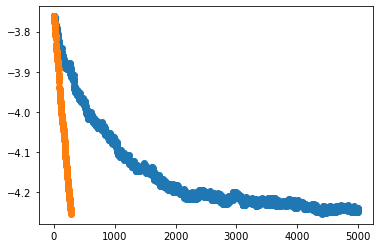

In [85]:
import matplotlib.pylab as plt
plt.plot(ms_,'o-')
plt.plot(ms,'o-')
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:33<00:00, 147.36it/s]


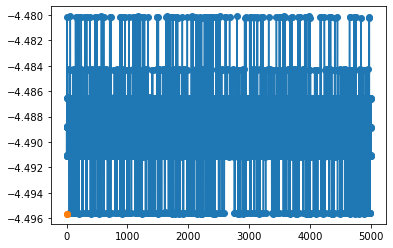

Hamming distances and counts:
[4. 6. 8.]
[ 3766 14485 15419]
[44. 44. 43. 43. 44. 43. 43. 43. 43. 43. 43. 44. 42. 43. 44. 43. 44. 44.
 43. 44. 43. 43. 43. 44.]


100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:33<00:00, 147.26it/s]


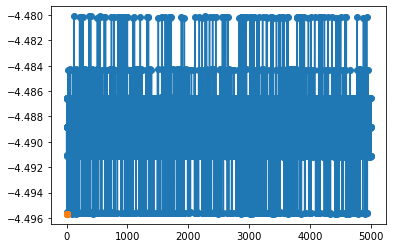

Hamming distances and counts:
[4. 6. 8.]
[ 3755 14507 15408]
[44. 44. 43. 43. 44. 43. 43. 44. 43. 43. 43. 43. 43. 44. 43. 44. 43. 44.
 43. 44. 43. 43. 42. 44.]


100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:33<00:00, 147.33it/s]


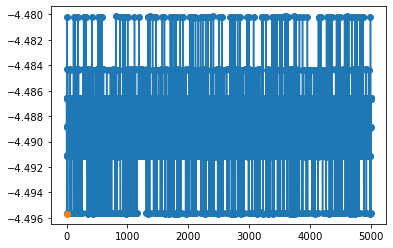

Hamming distances and counts:
[4. 6. 8.]
[ 3757 14502 15411]
[44. 44. 43. 44. 44. 43. 43. 43. 43. 43. 43. 43. 44. 44. 43. 43. 43. 44.
 43. 43. 43. 43. 43. 44.]


100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:33<00:00, 147.17it/s]


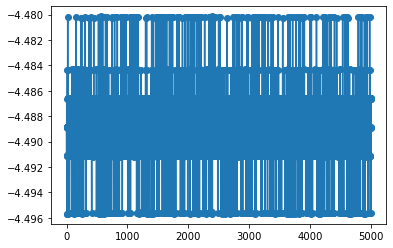

Hamming distances and counts:
[4. 6. 8.]
[ 3757 14502 15411]
[44. 44. 43. 44. 44. 43. 43. 43. 43. 43. 43. 43. 44. 44. 43. 43. 43. 44.
 43. 43. 43. 43. 43. 44.]


100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:33<00:00, 147.14it/s]


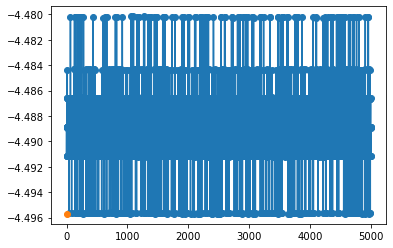

Hamming distances and counts:
[4. 6. 8.]
[ 3752 14512 15406]
[44. 44. 43. 44. 43. 43. 43. 43. 44. 43. 43. 44. 44. 43. 43. 43. 43. 43.
 44. 43. 43. 43. 43. 44.]


In [92]:
for it_ in range(5):
    keep_final, ms_, ms = balance_codes(N=24,Non=4, keep=keep_final, Niter = 5000,beta = 1000000,nneigh=200)

    import matplotlib.pylab as plt
    plt.plot(ms_,'o-')
    plt.plot(ms,'o-')
    plt.show()

    print_hamming_dists(keep_final)
    print(np.sum(keep_final,axis=0))

In [93]:
print_hamming_dists(keep)
print(np.sum(keep,axis=0))

print_hamming_dists(keep_final)
print(np.sum(keep_final,axis=0))

Hamming distances and counts:
[0. 2. 4. 6. 8.]
[    4   250  3597 14588 15231]
[40. 38. 36. 50. 49. 33. 38. 54. 40. 44. 50. 43. 47. 33. 40. 42. 52. 41.
 62. 43. 40. 42. 44. 39.]
Hamming distances and counts:
[4. 6. 8.]
[ 3752 14512 15406]
[44. 44. 43. 44. 43. 43. 43. 43. 44. 43. 43. 44. 44. 43. 43. 43. 43. 43.
 44. 43. 43. 43. 43. 44.]


In [95]:
len(keep_final)

260

In [94]:
np.save('code_24bit-260gns.npy',keep_final)

#### Get expression across cell groups

In [115]:
### Load expression across all genes from scRNAseq 

lines = np.array([ln[:-1].split(',') for ln in open(r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\MERFISH\50percEpibo_umis.txt','r')])
cells = lines[0][1:]
genes = lines[1:,0]
X_expr_all = lines[1:,1:].astype(np.float32)

In [ ]:
### Some genes have bad names. Find their names in the scRNA seq data

In [165]:
def get_alternative_names(bad_name):
    import urllib.request
    fp = urllib.request.urlopen("https://zfin.org/search?category=Gene+%2F+Transcript&q="+bad_name)
    mybytes = fp.read()

    mystr = mybytes.decode("utf8")
    fp.close()
    #print(mystr)
    
    start=False
    nms_=[]
    lines = mystr.split('\n')
    ilns = []
    for iln,ln in enumerate(lines):
        tag = 'result-header search-result-name clearfix'
        if tag in ln:
            ilns.append(iln+1)
    #print(ilns)
    nms_ = [lines[iln][:-1].split('>')[-1].split('<')[0].upper() for iln in ilns]
    txt_ = mystr.split('Previous Names')[-1]
    lines = txt_.split('\n')
    for ln in lines:
        ln_ = ln
        ln_ = ln_.replace(' ','')
        if len(ln_)>0:
            if '<' not in ln_:
                start=True
                nms_.append(ln_.replace(',','').upper())
            if start and '<' in ln:
                break
    """tag = '    <title>'
    final_name = [ln.split(tag)[-1].split(' ')[0] for ln in mystr.split('\n') if tag in ln][0]
    try:
        alt_names = mystr.split("Also known as")[-1].split('<dd>')[1].split('</dd>')[0].split('; ')

    except:
        alt_names = []
    alt_names=[final_name]+alt_names
    return alt_names"""
    return nms_

In [166]:
#alt_names = get_alternative_names("CHRD")

get_alternative_names('BX914220.1')

['IM:7152348', 'CEP63', 'CHR:', '6']

In [182]:
import sys,os,glob
sys.path.append(os.path.abspath(r'LibraryDesign3'))
import LibraryDesigner as ld
import LibraryTools as lt
from seqint import seq2Int, seq2Int_rc
# some other packages may required
import Bio #use pip install biopython
import numpy as np

import glob,os
files_ = np.sort(glob.glob(r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\MERFISH\single_genes\*.fasta'))
files_ = [fl for fl in files_ if 'auto' not in fl.lower()]
genes_keep = [lt.fastaread(fl)[0][0].split('|')[-4].upper() for fl in files_]
genes_keep

['BX914220.1',
 'BX927327.1',
 'ACACB',
 'ACVR1BA',
 'ADMP',
 'ALDH1A2',
 'ALDOB',
 'AMOTL2A',
 'APLNRB',
 'APOA1B',
 'ARG2',
 'ARHGAP29B',
 'ARHGEF37',
 'ARL4AB',
 'ATP1B3A',
 'AVPR2AB',
 'AXIN2',
 'BAMBIA',
 'BLF',
 'BMP2B',
 'BMP4',
 'BMP7A',
 'CALR',
 'CBX7A',
 'CCDC80L1',
 'CDX1A',
 'CDX4',
 'CHRD',
 'CLDNB',
 'CLDNE',
 'COL7A1',
 'CRABP2B',
 'CRFB4',
 'CSAD',
 'CST3',
 'CTH1',
 'CTSLB',
 'CXCL12A',
 'CYP26A1',
 'CYP27C1',
 'CYP2AA8',
 'CYT1',
 'DACT2',
 'DKK1B',
 'DLX2A',
 'DLX3B',
 'DRAM1',
 'DRL',
 'DUSP4',
 'DUSP6',
 'EFNB2A',
 'EFNB2B',
 'ELOVL1A',
 'ELOVL6',
 'EPPK1',
 'ERC1B',
 'ETS2',
 'ETV4',
 'EVE1',
 'EVPLA',
 'FA2H',
 'FBXW4',
 'FGF17',
 'FGF24',
 'FGF3',
 'FGF4',
 'FGF8A',
 'FHDC2',
 'FLRT3',
 'FMNL1A',
 'FOXA',
 'FOXA2',
 'FOXA3',
 'FOXB1A',
 'FOXC1A',
 'FOXD3',
 'FOXD5',
 'FOXH1',
 'FOXI1',
 'FOXI3A',
 'FOXJ1A',
 'FOXJ1B',
 'FRZB',
 'FSCN1A',
 'FUCA1.1',
 'FZD4',
 'FZD5',
 'FZD8A',
 'FZD8B',
 'GADD45BA',
 'GATA2A',
 'GATA5',
 'GATA6',
 'GREB1',
 'GRHL1',
 'GRHL3',
 

In [ ]:
dic_rename = {}
for gn in genes_keep: 
    if gn not in genes:
        dic_rename[gn]='XXXXXXXXXXX'
        #print(gn,'----------')
        for gn_ in get_alternative_names(gn): 
            if gn_ in genes:
                #print(gn,gn_)
                dic_rename[gn]=gn_

In [234]:
dic_rename={'BX914220.1': 'CEP63',
 'BX927327.1': 'WNT8A',
 'ACACB': 'ACACA',
 'ACVR1BA': 'ACVR1B',
 'ARHGEF37': 'ARHGEF3',
 'AVPR2AB': 'AVPR2L',
 'CCDC80L1': 'CCDC80',
 'CDX1A': 'CFTR',
 'CHRD': 'CHD',
 'COL7A1': 'KAT2B',
 'CTSLB': 'CTSL1B',
 'EPPK1': 'EPPK1',
 'ERC1B': 'ERC1A',
 'FHDC2': '',
 'FMNL1A': '',
 'FZD4': 'FZD1',
 'GREB1': '',
 'GRHL1': 'GRHL2A',
 'GRHL3': 'GRHL2B',
 'HSD3B2': 'HSD3B1',
 'IER2A': 'ELMOD2',
 'INKA1B': 'FAM212AB',
 'ITGA4': 'CFTR',
 'KAT6B': 'KAT2B',
 'KCNH6A': 'KCNH6',
 'KRT92': 'ZGC:109868',
 'KRT99': 'ZGC:110712',
 'MAGI1A': 'MAGI1B',
 'MSX1A': 'MSXE',
 'MSX1B': 'MSXB',
 'MSX2B': 'MSXD',
 'MSX3': 'MSXC',
 'MYADML2': '',
 'BHIK': 'BIK',
 'NEU4': 'NEU1',
 'NRIP1A': '',
 'OTX1': 'OTX1B',
 'OTX2A': 'OTX1A',
 'PDIA6': 'PDIP5',
 'PKP3B': 'PKP3A',
 'PLEKHG5B': 'PLEKHG7',
 'RBM33A': 'RBM34',
 'RND1B': 'RND1L',
 'RNF19A': 'RNF19B',
 'SHISA2A': 'SHISA2',
 'SI:DKEYP-9D4.3': '',
 'SMAD6B': 'SMAD6A',
 'SOX13': '',
 'TBX16L': 'TBX6',
 'TBXTA': 'TA',
 'TDRD7B': 'SLBP',
 'TIE1': 'GDF3',
 'VMO1A': '',
 'WNT11F2': 'WNT11'}

In [242]:
X_expr_all.shape,len(genes),genes

((13902, 20),
 13902,
 array(['A2ML', 'AAAS', 'AACS', ..., 'ZYMND12', 'ZYX', 'ZZZ3'],
       dtype='<U18'))

In [256]:
X_expr = []
genes_ = list(genes)
for gn in genes_keep:
    gn_ = dic_rename.get(gn,gn)
    if gn_ in genes_:
        ign = genes_.index(gn_)
        X_expr.append(X_expr_all[ign])
    else:
        X_expr.append(X_expr_all[0]*0)
X_expr = np.array(X_expr)
import pickle
pickle.dump([genes_keep,X_expr,dic_rename],
            open(r"G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\genes_X_expr_dic.pkl",'wb'))

#### Separate out very abundant genes

In [265]:
genes_keep,X_expr,dic_rename = pickle.load(open(r"G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\genes_X_expr_dic.pkl",'rb'))

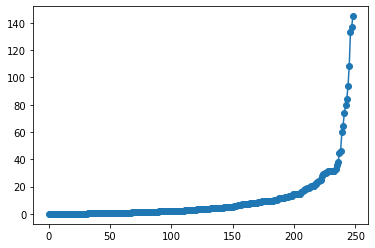

In [266]:
plt.figure()
plt.plot(np.sort(np.max(X_expr,-1)),'o-')

In [378]:
Xmax = np.max(X_expr,-1)
cutoff = 35
keep_comb = Xmax<cutoff
print(np.sum(keep_comb))
genes_comb = np.array(genes_keep)[keep_comb]
genes_seq = np.array(genes_keep)[~keep_comb]
X_expr_ = X_expr[keep_comb]

235


#### Asign code to best match the 

In [363]:
def metric_genes(X_expr,code,icodes):
    code_ = code[icodes]
    cell_expr = np.dot(X_expr,code_)
    return np.std(np.max(cell_expr,axis=0))+np.std(np.mean(cell_expr,axis=0))
def randomchange(icode):
    """Randomly switch 2 elements from two lists."""
    icode_ = icode.copy()
    i1 = np.random.randint(len(icode_))
    i2 = np.random.randint(len(icode_))
    icode_[i1],icode_[i2] = icode_[i2],icode_[i1]
    return icode_

def balance_genes(X_expr, code, icodes=None, Niter = 30000,beta = 1000):
    """Balances the bits used in bin_code[keep] by swapping indices into keep"""
    Ngenes = len(X_expr[0])
    if icodes is None:
        icodes = np.random.choice(len(code),Ngenes,replace=False)
    m_abs = metric_genes(X_expr,code,icodes)
    m0 = m_abs
    
    ms = []
    ms_ = []
    icodes0 = icodes.copy()
    for irep in tqdm(range(Niter)):
        icodes_ = randomchange(icodes)  # switch two elements
        m_ = metric_genes(X_expr,code,icodes_)  # evaluate how uniform
        if m_ < m_abs:
            icodes = icodes_.copy()
            m0 = m_
            m_abs = m_
            icodes_final = icodes.copy()
            ms.append(m0)
        else:
            p = np.exp((m0 - m_) * beta)
            if np.random.rand() < p:
                icodes = icodes_.copy()
                m0 = m_
        ms_.append(m_)
    if len(ms)==0:
        icodes_final = icodes0
    return icodes_final, ms_, ms
def metric_genes(X_expr_,code,icodes):
    #code_ = code_bad
    #X_expr_ = X_expr_bad
    code_ = code[icodes]
    code__ = code_==1
    rs = []
    for ib in range(code__.shape[-1]):
        cd_bit = code__[:,ib]

        X__ = X_expr_[:,cd_bit]
        if X__.shape[-1]>0:
            
            max_min = np.sum(np.mean(np.sum(X__,axis=-1)[:,np.newaxis]-X__,axis=0))
  
            rs.append(max_min)
    #rs = np.array(rs)
    return np.sum(rs)


In [360]:
def metric_genes(X_expr,code,icodes):
    code_ = code[icodes]
    cell_expr = np.dot(X_expr,code_)
    return np.std(np.max(cell_expr,axis=0))+np.std(np.mean(cell_expr,axis=0))

In [353]:
X_expr_ = X_expr_.T

In [354]:
len(X_expr_[0])

235

In [364]:
code = np.load(r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\code_24bit-260gns.npy')
Ngenes = len(X_expr_[0])
icodes = np.random.choice(len(code),Ngenes,replace=False)
icodes_final, ms_, ms = balance_genes(X_expr_, code, icodes=icodes, Niter = 5000,beta = 1000)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1617.18it/s]


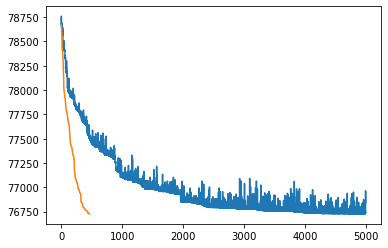

In [365]:
plt.plot(ms_)
plt.plot(ms)
plt.show()

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:31<00:00, 1609.98it/s]


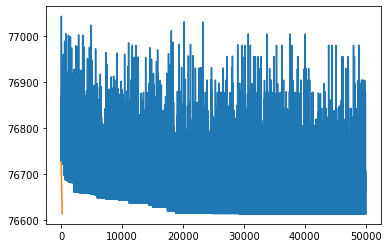

In [366]:
icodes_final, ms_, ms = balance_genes(X_expr_, code, icodes=icodes_final, Niter = 50000,beta = 10000)
plt.plot(ms_)
plt.plot(ms)
plt.show()

In [314]:
#icodes_final_save = icodes_final.copy()

In [317]:
#icodes_final = icodes_final_save

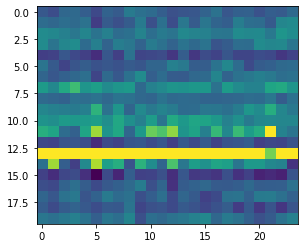

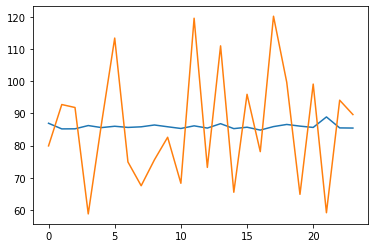

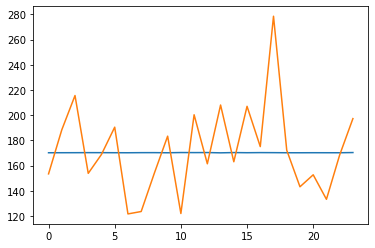

In [362]:
code_ = code[icodes_final]
cell_expr = np.dot(X_expr_,code_)
plt.imshow(cell_expr)


plt.figure()
code_ = code[icodes_final]
cell_expr = np.dot(X_expr_,code_)
plt.plot(np.mean(cell_expr,axis=0))
code_ = code[icodes]
cell_expr_ = np.dot(X_expr_,code_)
plt.plot(np.mean(cell_expr_,axis=0))

plt.figure()
code_ = code[icodes_final]
cell_expr = np.dot(X_expr_,code_)
plt.plot(np.max(cell_expr,axis=0))
code_ = code[icodes]
cell_expr_ = np.dot(X_expr_,code_)
plt.plot(np.max(cell_expr_,axis=0))


In [381]:
code[icodes_final].astype(np.uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1]], dtype=uint8)

In [384]:
pickle.dump([genes_comb,genes_seq,code[icodes_final].astype(np.uint8)],open(r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\MERFISH_comb_code_seq.pkl','wb'))

In [387]:
dic_iR = {}
genes_comb,genes_seq,code_comb = pickle.load(open(r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\MERFISH_comb_code_seq.pkl','rb'))
for gn,cd in zip(genes_comb,code_comb):
    dic_iR[gn]=np.where(cd)[0]
nmax = np.max([iR for gn in dic_iR for iR in dic_iR[gn]])+1
for ign,gn in enumerate(genes_seq):
    dic_iR[gn]=[ign+nmax]

### Finalize library

In [ ]:
dic_iR = {}
genes_comb,genes_seq,code_comb = pickle.load(open(r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\MERFISH_comb_code_seq.pkl','rb'))
for gn,cd in zip(genes_comb,code_comb):
    dic_iR[gn]=np.where(cd)[0]
nmax = np.max([iR for gn in dic_iR for iR in dic_iR[gn]])+1
for ign,gn in enumerate(genes_seq):
    dic_iR[gn]=[ign+nmax]

In [391]:
import numpy as np
txts = [ln.replace('\n','').split(',') for ln in open(r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\Readouts\NDB_brightness2.csv','r') if len(ln)>2]
head = txts[0]
txts = np.array(txts)[1:]
ndbs_info = np.array([r for r1,r2,r3 in zip(txts[txts[:,1]=='750'],txts[txts[:,1]=='647'],txts[txts[:,1]=='561']) for r in [r1,r2,r3]])


In [396]:
import sys,os,glob
sys.path.append(os.path.abspath(r'LibraryDesign3'))
import LibraryDesigner as ld
import LibraryTools as lt
from seqint import seq2Int, seq2Int_rc
# some other packages may required
import Bio #use pip install biopython
import numpy as np

import glob,os


def read_target_seqs(fl):
    txts = np.array([ln.replace('\n','').split(',') for ln in open(fl,'r') if len(ln)>2][1:])
    seqs = np.array([txt.replace("'",'')[1:] for txt in txts[:,0]])
    names = txts[:,1]
    return names,seqs

files_ = np.sort(glob.glob(r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\MERFISH\single_genes\*.fasta'))
files_ = [fl for fl in files_ if 'auto' not in fl.lower()]
genes_keep = [lt.fastaread(fl)[0][0].split('|')[-4].upper() for fl in files_]
dic_pbs = {gn:read_target_seqs(fl.replace('.fasta','_v2.csv')) for gn,fl in zip(genes_keep,files_)}

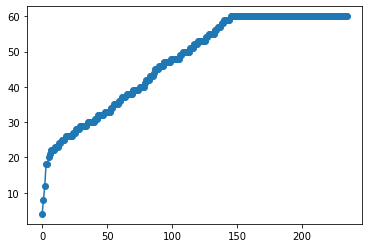

In [405]:
lsqs=[]
for gn in gene_comb:
    names_pb,seqs_pb =  dic_pbs[gn]
    #print(gn,len(seqs_pb))
    lsqs.append(len(seqs_pb))
    
lsqs_ = np.sort(lsqs)
lsqs_[lsqs_>60]=60
plt.figure()
plt.plot(lsqs_,'o-')

In [426]:
#pcr_primers = np.array([ln.replace('\n','').split(',') for ln in open(r'C:\Users\Bogdan\Dropbox\ChrisGlass_Project\readouts_primers\PCR_primers - pcr.csv','r') if len(ln)>2][1:])
pcr_primers

array([['W1A01_primer_0', 'CGGCTCGCAGCGTGTAAACG'],
       ['W1A02_primer_1', 'TAATACGACTCACTATAGGGCATTTCAGGATCACCGGCGG'],
       ['W1A03_primer_2', 'CCCGCAATGGCTGACAACCG'],
       ['W1A04_primer_3', 'TAATACGACTCACTATAGGGCGTTGTATGCCCTCCACGC'],
       ['W1A05_primer_4', 'CATTCAGCATTGCGCAACGG'],
       ['W1A06_primer_5', 'TAATACGACTCACTATAGGGTCTTCCCGCAAATGCACCG'],
       ['W1A07_primer_6', 'CGCAAACTGGTGCGGAAGGC'],
       ['W1A08_primer_7', 'TAATACGACTCACTATAGGGCCCTTTCGCGCTGCATCGAC'],
       ['W1A09_primer_8', 'TTGTTGAGGCGGCGGAAGTC'],
       ['W1A10_primer_9', 'TAATACGACTCACTATAGGGATTGCCGCATGGTTTCCG'],
       ['W1A11_primer_10', 'TTGCTAGCGTGGGCCAATCG'],
       ['W1A12_primer_11', 'TAATACGACTCACTATAGGGCCATTGCCCGCGAGGTCGAG'],
       ['W1B01_primer_12', 'TTGGGCGTGCACGTCAATTC'],
       ['W1B02_primer_13', 'TAATACGACTCACTATAGGGCAATTAATCGCCCGGTGCCA'],
       ['W1B03_primer_14', 'GACATCCAGGCGCGGACAAC'],
       ['W1B04_primer_15', 'TAATACGACTCACTATAGGGCTTGTGCATCGCGCCAAAGA'],
       ['W1B05_primer_

In [428]:
### combinatorial
A_nm,A = 'W1B01', 'TTGGGCGTGCACGTCAATTC'
B_nm,B = 'W1B02', 'TAATACGACTCACTATAGGGCAATTAATCGCCCGGTGCCA'
B = lt.seqrc(B[-20:])

cnames,cseqs=ndbs_info[:,0],ndbs_info[:,-1]

nmax=60
seqs_lib,names_lib=[],[]
nm_tag = 'Combinatorial__'+A_nm+'__'+B_nm+'__'
for gn in gene_comb:
    names_pb,seqs_pb =  dic_pbs[gn]
    names_pb,seqs_pb = names_pb[:nmax],seqs_pb[:nmax]
    for isq,(nmpb,sqpb) in enumerate(zip(names_pb,seqs_pb)):
        iRs = dic_iR[gn]
        iR1,iR2,iR3 = iRs[(isq)%len(iRs)],iRs[(isq+1)%len(iRs)],iRs[(isq+2)%len(iRs)]
        #print(iR1,iR2,iR3)
        R1,R2,R3=cseqs[iR1],cseqs[iR2],cseqs[iR3]
        nmR1,nmR2,nmR3= cnames[iR1],cnames[iR2],cnames[iR3]
        sqf = lt.up_down([A,R1,lt.seqrc(sqpb),R2,R1,B])
        nmf=nm_tag+nmpb+'__'+nmR1+'__'+nmR2
        seqs_lib+=[sqf]
        names_lib+=[nmf]
        
### sequential
A_nm,A = 'W1B05', 'CGGGTTTCGTTGCGCACACC'
B_nm,B = 'W1B06', 'TAATACGACTCACTATAGGGCCTGTGCGGAAATCGCGAGA'
B = lt.seqrc(B[-20:])


nmax=60

nm_tag = 'Sequential__'+A_nm+'__'+B_nm+'__'
for gn in genes_seq:
    names_pb,seqs_pb =  dic_pbs[gn]
    names_pb,seqs_pb = names_pb[:nmax],seqs_pb[:nmax]
    for isq,(nmpb,sqpb) in enumerate(zip(names_pb,seqs_pb)):
        iRs = dic_iR[gn]
        iR1,iR2,iR3 = iRs[(isq)%len(iRs)],iRs[(isq+1)%len(iRs)],iRs[(isq+2)%len(iRs)]
        #print(iR1,iR2,iR3)
        R1,R2,R3=cseqs[iR1],cseqs[iR2],cseqs[iR3]
        nmR1,nmR2,nmR3= cnames[iR1],cnames[iR2],cnames[iR3]
        sqf = lt.up_down([A,R1,lt.seqrc(sqpb),R2,R1,B])
        nmf=nm_tag+nmpb+'__'+nmR1+'__'+nmR2
        seqs_lib+=[sqf]
        names_lib+=[nmf]
lt.fastawrite(r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\MERFISH\ASBB_M2.fasta',names_lib,seqs_lib)

In [432]:
lib_names,lib_seqs=[],[]
for fl in [r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\MERFISH\ASBB_M1.fasta',
          r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\MERFISH\ASBB_M2.fasta']:
    lib_names_,lib_seqs_ = lt.fastaread(fl)
    lib_seqs+=lib_seqs_
    lib_names+=lib_names_
lt.fastawrite(r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\MERFISH\ASBB_L1.fasta',lib_names,lib_seqs)

### Check library

In [443]:
lib_names,lib_seqs = lt.fastaread(r'G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\MERFISH\ASBB_L1.fasta')

In [444]:
print("Lengths of seqs:",np.unique([len(e) for e in lib_seqs]))
print("Number of unique/total seqs:",len(np.unique(lib_seqs)),len(lib_seqs))

Lengths of seqs: [140]
Number of unique/total seqs: 23308 23308


In [445]:
print("Sublibraries")
ipru,iindu,cts = np.unique([sq[:20]+sq[-20:] for sq in lib_seqs],return_index=True,return_counts=True)
list(zip(np.array(lib_names)[iindu],np.array(lib_seqs)[iindu],cts))

Sublibraries


[('Sequential__W1B05__W1B06__aldob_pb_0__NDB_643__NDB_643',
  'CGGGTTTCGTTGCGCACACCgcaaggtaacaggtcgttcgCTTCTGCTCCGTAGAGAGAGCTGGAAACTGGTGTGTCATGgcaaggtaacaggtcgttcgGCAAGGTAACAGGTCGTTCGtctcgcgatttccgcacagg',
  557),
 ('W1B03--W1B04__bcm_1__wnt11f2_pb_0',
  'GACATCCAGGCGCGGACAACtatgaggacgaatctcccgcGTTTTTCCACAACGGTCAAGATACACCACGGACTGTCTGAtatgaggacgaatctcccgcTATGAGGACGAATCTCCCGCtctttggcgcgatgcacaag',
  11652),
 ('Combinatorial__W1B01__W1B02__BX914220_pb_0__NDB_795__NDB_801',
  'TTGGGCGTGCACGTCAATTCcaaacgtgtaacagacgcccCACTCTTTAATGGTAAAAGGTGAGTCGGCTTTCCTTCTTCcaatgatcgtggacaccgacCAAACGTGTAACAGACGCCCtggcaccgggcgattaattg',
  11099)]

#### Check for mispriming

In [446]:
used_primers = np.unique([sq_ for sq in lib_seqs for sq_ in [sq[:20],sq[-20:]]])
from tqdm.notebook import tqdm
dists = [[lt.simmilar(prm.upper(),sq[20:-20].upper(),val=13)for prm in used_primers] for sq in tqdm(lib_seqs)]
dists = np.array(dists)

np.unique(dists,return_counts=True)

  0%|          | 0/23308 [00:00<?, ?it/s]

(array([0]), array([139848], dtype=int64))

#### Check readouts

##### Check sequential

In [456]:
def get_gn(nm):
    return [e for e in nm.split('__') if '_pb_' in e][0].split('_pb_')[0]
tag = 'W1B03--W1B04'
dic_readout = {}
for nm,sq in zip(lib_names,lib_seqs):
     if tag in nm:
        gn = get_gn(nm)
        if gn not in dic_readout:
            dic_readout[gn]=[]
        dic_readout[gn].append(sq[20:40])

In [459]:
[np.unique(dic_readout[gn],return_counts=True) for gn in dic_readout]

[(array(['ggtaactgcgcatagttggc', 'tatgaggacgaatctcccgc'], dtype='<U20'),
  array([10, 11], dtype=int64)),
 (array(['gccaccttaacacgcgatga', 'gggtacatgcgccttactcc'], dtype='<U20'),
  array([23, 23], dtype=int64)),
 (array(['agggccaagtcgacctagat', 'ggatacatatacgctcgtcg'], dtype='<U20'),
  array([15, 15], dtype=int64)),
 (array(['gcaatttgcgcttgttcggc', 'taacgattttctcgcgggag'], dtype='<U20'),
  array([30, 29], dtype=int64)),
 (array(['tgctctaaagacgcgaggac', 'ttgacatgtacgccatttgg'], dtype='<U20'),
  array([11, 11], dtype=int64)),
 (array(['ctgatcaacttgcgcccagc', 'gcaattcagtacgatcgtgt'], dtype='<U20'),
  array([11, 12], dtype=int64)),
 (array(['gggtagtcgtgaggtgaact', 'gtctaatatggcgtagctca'], dtype='<U20'),
  array([15, 14], dtype=int64)),
 (array(['tataataggtggcgggctgc', 'ttattccgtggaaatccgca'], dtype='<U20'),
  array([11, 12], dtype=int64)),
 (array(['agagggctcgtcacttaggt', 'ttattctgtcgcaaaccgat'], dtype='<U20'),
  array([13, 13], dtype=int64)),
 (array(['gagaaaattcggcagacccg', 'taggggaccgat

In [465]:
print("Number of genes:",len(dic_readout))
print("Number of readouts:",len(np.unique([sq_ for gn in dic_readout for sq_ in dic_readout[gn]])))

Number of genes: 248
Number of readouts: 496


##### Check combinatorial MERFISH

In [498]:
def get_gn(nm):
    return [e for e in nm.split('__') if '_pb_' in e][0].split('_pb_')[0]
tag = 'Combinatorial__'
dic_readout = {}
for nm,sq in zip(lib_names,lib_seqs):
     if tag in nm:
        gn = get_gn(nm)
        if gn not in dic_readout:
            dic_readout[gn]=[]
        dic_readout[gn].append(sq[20:40])
print("Number of genes with tag:"+tag,len(dic_readout))

Number of genes with tag:Combinatorial__ 235


In [468]:
[np.unique(dic_readout[gn],return_counts=True) for gn in dic_readout]

[(array(['caaacgtgtaacagacgccc', 'caatgatcgtggacaccgac',
         'ggtacctactaaagcgccta', 'taccgcggcttagtagttga'], dtype='<U20'),
  array([9, 9, 9, 8], dtype=int64)),
 (array(['caaacgtgtaacagacgccc', 'gtctaaggacatcgacatat',
         'tgtaccagtacgcagccgac', 'ttcggaaagtgacaaccacc'], dtype='<U20'),
  array([12, 13, 12, 12], dtype=int64)),
 (array(['caaacgtgtaacagacgccc', 'caatgatcgtggacaccgac',
         'taaggccaccttgcgataag', 'tcacatatccgaccgggatc'], dtype='<U20'),
  array([15, 15, 15, 15], dtype=int64)),
 (array(['caaacgtgtaacagacgccc', 'caatgatcgtggacaccgac',
         'cataaggatcctgcaatacg', 'gtctaaggacatcgacatat'], dtype='<U20'),
  array([15, 15, 15, 15], dtype=int64)),
 (array(['accgatttatgaggccgttc', 'ccgagagtcaacgacagtca',
         'ggtacctactaaagcgccta', 'taaggccaccttgcgataag'], dtype='<U20'),
  array([12, 13, 12, 12], dtype=int64)),
 (array(['aatgcttagtcaacgagttc', 'acacgctataaagggtcgat',
         'taaggccaccttgcgataag', 'tcacatatccgaccgggatc'], dtype='<U20'),
  array([13, 12, 12

In [481]:
gns_codes = [np.unique(dic_readout[gn]) for gn in dic_readout]
Rs_ = list(np.unique([e for es in gns_codes for e in es]))
nbits = len(Rs_)
gns_codes = np.array([[r in gn_cd for r in Rs_ ] for gn_cd in gns_codes],dtype=np.float32)
np.sum(gns_codes,axis=0),np.sum(gns_codes,axis=1)

(array([41., 38., 38., 34., 41., 40., 40., 40., 40., 41., 37., 37., 40.,
        41., 38., 36., 41., 41., 39., 39., 39., 39., 38., 42.],
       dtype=float32),
 array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
    

In [485]:
### check hamming distances
np.unique(pdist(gns_codes,metric='hamming')*len(gns_codes[0]),return_counts=True)


(array([4., 6., 8.]), array([ 3065, 11850, 12580], dtype=int64))

In [499]:
def get_gn(nm):
    return [e for e in nm.split('__') if '_pb_' in e][0].split('_pb_')[0]
tag = 'Sequential__'
dic_readout = {}
for nm,sq in zip(lib_names,lib_seqs):
     if tag in nm:
        gn = get_gn(nm)
        if gn not in dic_readout:
            dic_readout[gn]=[]
        dic_readout[gn].append(sq[20:40])
print("Number of genes with tag:"+tag,len(dic_readout))

Number of genes with tag:Sequential__ 14


In [501]:
!dir

 Volume in drive G is Google Drive
 Volume Serial Number is 1983-1116

 Directory of G:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning

07/03/2022  12:19 PM    <DIR>          .
03/30/2022  09:58 AM    <DIR>          ..
03/30/2022  09:58 AM    <DIR>          SeqLibrary
06/22/2022  11:12 AM    <DIR>          z11
03/30/2022  10:01 AM    <DIR>          CommonTools
06/22/2022  12:02 PM    <DIR>          LibraryDesign3
03/28/2022  10:03 PM           171,892 cDNA_biomart_example.png
06/23/2022  06:01 AM           977,169 GenerateSeqLibrary.ipynb
07/03/2022  12:13 PM    <DIR>          .ipynb_checkpoints
07/03/2022  12:19 PM         6,361,812 GenerateMERFISHLibrary1.ipynb
07/03/2022  12:33 PM    <DIR>          MERFISH
06/23/2022  04:59 PM    <DIR>          Readouts
06/26/2022  10:17 PM            25,088 code_24bit-260gns.npy
06/27/2022  07:30 AM            23,062 genes_X_expr_dic.pkl
07/02/2022  10:10 PM            22,854 MERFISH_comb_code_seq.pkl
               6 File(s)      7,581,877 

#### Check target seqeunces

In [497]:
lib_names[1300],lib_seqs[1300]

('W1B03--W1B04__bcm_678__bmp2b_pb_961',
 'GACATCCAGGCGCGGACAACaactgctgtcacggtaccgaCCCACGTCGAAGCTTTCCCAGCGCGTGTGAGAGTCCTGCAaactgctgtcacggtaccgaAACTGCTGTCACGGTACCGAtctttggcgcgatgcacaag')

In [ ]:
Danio rerio bone morphogenetic protein 2b (bmp2b), mRNA
Sequence ID: NM_131360.2Length: 2001Number of Matches: 1
Related Information
Gene-associated gene details
Genome Data Viewer-aligned genomic context
Range 1: 983 to 1022GenBankGraphicsNext MatchPrevious Match
Alignment statistics for match #1
Score	Expect	Identities	Gaps	Strand
75.0 bits(40)	9e-14	40/40(100%)	0/40(0%)	Plus/Minus
Query  1     CCCACGTCGAAGCTTTCCCAGCGCGTGTGAGAGTCCTGCA  40
             ||||||||||||||||||||||||||||||||||||||||
Sbjct  1022  CCCACGTCGAAGCTTTCCCAGCGCGTGTGAGAGTCCTGCA  983


#### Previous library

In [ ]:
('single_genes___W1A05__W1A06__NDB_847__hes6_pb_229',
  'CATTCAGCATTGCGCAACGGccaatgtctcgtacgtgaccATTTTTACCTGCGCATCCGGGTCGGCTAGCAGTAGCCGAAccaatgtctcgtacgtgaccCCAATGTCTCGTACGTGACCcggtgcatttgcgggaagac')

In [ ]:
Danio rerio hes family bHLH transcription factor 6 (hes6), mRNA
Sequence ID: NM_194400.2Length: 1294Number of Matches: 1
Related Information
Gene-associated gene details
Genome Data Viewer-aligned genomic context
Range 1: 207 to 246GenBankGraphicsNext MatchPrevious Match
Alignment statistics for match #1
Score	Expect	Identities	Gaps	Strand
75.0 bits(40)	9e-14	40/40(100%)	0/40(0%)	Plus/Minus
Query  1    ATTTTTACCTGCGCATCCGGGTCGGCTAGCAGTAGCCGAA  40
            ||||||||||||||||||||||||||||||||||||||||
Sbjct  246  ATTTTTACCTGCGCATCCGGGTCGGCTAGCAGTAGCCGAA  207


### Orders

In [ ]:
### previous library
W1A07,CGCAAACTGGTGCGGAAGGC,100nm,STD
W1A10,TAATACGACTCACTATAGGGATTGCCGCATGGTTTCCG,100nm,STD
RT-Acr_W1A07,/5Acryd/CGCAAACTGGTGCGGAAGGC,250nm,HPLC

In [ ]:
W1B01_MERC,TTGGGCGTGCACGTCAATTC,100nm,STD
W1B02_MERC,TAATACGACTCACTATAGGGCAATTAATCGCCCGGTGCCA,STD
Acr_W1B01_MERS,/5Acryd/TTGGGCGTGCACGTCAATTC,250nm,HPLC
W1B05_MERS,CGGGTTTCGTTGCGCACACC,100nm,STD
W1B06_MERS,TAATACGACTCACTATAGGGCCTGTGCGGAAATCGCGAGA,STD
Acr_W1B05_MERS,/5Acryd/CGGGTTTCGTTGCGCACACC,250nm,HPLC
W1B03_SEQ,GACATCCAGGCGCGGACAAC,100nm,STD
W1B04_SEQ,TAATACGACTCACTATAGGGCTTGTGCATCGCGCCAAAGA,STD
Acr_W1B03_SEQ,/5Acryd/GACATCCAGGCGCGGACAAC,250nm,HPLC